## Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации.
Нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. Попробовать ответить на вопрос, насколько такие фильмы интересны зрителю.
Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

Изучим рынок российского кинопроката и выявим текущие тренды на основе данных предоставленных Министерством культуры. Попробуем ответить на вопрос, насколько фильмы с господдержкой интересны зрителю.

### 1. Откроем файлы с данными и объединим их в один датафрейм. 

Импортируем все, что нам нужно для работы, заапустим оба датасета и посмотрим на них

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
try:
    df = pd.read_csv('/datasets/mkrf_movies.csv') #путь яндекса
except:
    df = pd.read_csv('C:\Учеба\Аналитик данных\dataset\mkrf_movies.csv') # если же ошибка - мой путь

In [5]:
try:
    df1 = pd.read_csv('/datasets/mkrf_shows.csv') #путь яндекса
except:
    df1 = pd.read_csv('C:\Учеба\Аналитик данных\dataset\mkrf_shows.csv') # если же ошибка - мой путь

In [6]:
def start(data):
    display(data.head()) 
    display(data.tail()) 
    data.info()
    display(data.columns.str.lower())
    display(data.duplicated().sum())
    display(pd.DataFrame((data.isna().mean()*100).round(2)).style.background_gradient('coolwarm'))

In [7]:
start(df)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер"
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
7485,"Машины песенки. Серия ""Когда цветут кактусы""",124010719,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",И.Трусов,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.3,"комедия,вестерн"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Index(['title', 'punumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres'],
      dtype='object')

0

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.240000
production_country,0.030000
director,0.120000
producer,7.590000
age_restriction,0.000000
refundable_support,95.570000


In [8]:
start(df1)

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


,puNumber,box_office
3153,224014814,1530.0
3154,224021411,9270.0
3155,224022410,400.0
3156,224023210,360.0
3157,224026410,400.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Index(['punumber', 'box_office'], dtype='object')

0

,0
puNumber,0.000000
box_office,0.000000


Мы видим, что в таблице df есть пропущенные значения в половине столбцов, а в таблице df1 все столбцы заполнены полностью, так же что мы можем сделать объединение таблиц по столбцу puNumber, но в обоих таблицах у этого столбца разный тип данных, приведем к одному, проверим столбец на уникальные значения и объеденим их


In [9]:
df1.puNumber = df1.puNumber.astype('str')
df_all = df.merge(df1, how='left', on='puNumber')

In [10]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Теперь когда таблицы объеденены, можем заняться предобработкой

### 2. Предобработка данных

Проведем предобработку данных:
1. Приведем названия столбцов к единому стилю
2. Проверим тип данных и исправим где жто необходимо
3. Изучим пропуски и утсраним их
4. Изучим дубликаты и так же устраним их
5. Так же изучим категориальные и количественные значения
6. Добавим новые столбцы необходимые для исследования

#### 2.1 Проверим типы данных

Посмотрим на датафрейм и приведем в порядок название столбца puNumber.

In [11]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Приведем названия столбца puNumber к единому стилю. Переведем столбец show_start_date в формат времени, так же обработаем столбец рейтинг уберем некорректные значения

In [12]:
df_all=df_all.rename(columns={'puNumber':'pu_number'})

In [13]:
df_all['show_start_date'] = pd.to_datetime(df_all['show_start_date'])#переводим столбец в формат времени

In [15]:
df_all[df_all['ratings']=='99%']#посмотрим строки в которых в столбце ratings значения равны 99%

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
259,Прошлое,221030715,2015-07-29 12:00:00+00:00,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,99%,"ужасы,триллер,драма",NaN
1341,Сказка о добре и Вре,111008913,2013-11-15 12:00:00+00:00,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,99%,"триллер,драма,детектив",NaN
1805,Спираль.,111001014,2014-01-30 12:00:00+00:00,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,99%,"аниме,мультфильм,ужасы",4295.0
6882,Животные рядом со Святыми,112003719,2019-05-03 12:00:00+00:00,Документальный,"ООО ""Кинопрограмма ""XXI век""",Россия,Т.Мирошник,"В.Есинов, Е.Калинина",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,99%,"криминал,драма",NaN


In [16]:
df_all['ratings'] = pd.to_numeric(df_all['ratings'], errors='coerce')#Заменим значения на Nan и приведем столбец к вещественному типу

In [17]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   pu_number              7486 non-null   object             
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Мы изменили название столбца puNumber, так же изменили типы данных в некоторых столбцах, которые впоследствии пригодятся нам для анализа

#### 2.2 Изучим пропуски в датафрейме

Изучим пропуски и решим что делать дальше

In [18]:
pd.DataFrame((df_all.isna().mean()*100).round(2)).style.background_gradient('coolwarm')#смотрим пропуски

,0
title,0.000000
pu_number,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.240000
production_country,0.030000
director,0.120000
producer,7.590000
age_restriction,0.000000
refundable_support,95.570000


Мы видим, что в некоторых столбцах процент пропусков составляет менее 1%, если мы их удалим, на наше исследование это никак не повлияет. В столбцах producer,ratings, genres, box_office заполнение пропусков не представляется возможным, т.к. официальное API того же кинопоиска отсутствует, а неофициальное к сожалению не устанавливается. Поэтому оставим все как есть и проведем анализ.

In [19]:
df_all = df_all.dropna(subset=['pu_number','film_studio','production_country','director']).reset_index(drop=True)

In [20]:
pd.DataFrame(round((df_all.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
title,0.000000
pu_number,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
producer,7.560000
age_restriction,0.000000
refundable_support,95.550000


#### 2.3. Изучим дубликаты в датафрейме

In [21]:
df_all[df_all['title'].duplicated()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.4,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"фэнтези,приключения,семейный",759526.0
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00+00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.2,"фэнтези,приключения,семейный",1125302.0


Судя по всему дубликаты могут быть в таблице, так же встречаются в столбце title и могут быть разные фильмы с одинаковым названием, проверим их количество, удалим и обновим индекс

In [22]:
df_all['title'].duplicated().sum()

713

In [23]:
df_all = df_all.drop_duplicates(subset='title', keep="last")

In [24]:
df_all.duplicated().sum()

0

In [25]:
df_all['title'].duplicated().sum()

0

In [26]:
df_all.reset_index=True

In [27]:
df_all.pivot_table(index='title', values='director', aggfunc= lambda x: len(x.unique())).sort_values(by='director', ascending=False)

,director
title,
Я ПРЕПОД,1
Планета КА-ПЭКС /По мотивам романа Джин Бруэр/,1
По воле божьей,1
По версии Барни /По роману Мордехая Рихлера/,1
Пляжный бездельник,1
...,...
Идеальный муж,1
Идеальный голос 2 /По произведению Мики Рэпкина/,1
Идеальный голос /По произведению Мики Рэпкина/,1


#### 2.4. Изучим категориальные значения

Посмотрим на уникальные значения каждого столбца с  категориальными переменными и определим проблему

In [28]:
for i in df_all.columns:
    print (i, df_all[i].sort_values().unique())

title [' Я ПРЕПОД' '"SOS" над тайгой' '"V" значит вендетта' ... 'Ярость / Fury'
 'альманах документальных фильмов "Вокзалы России: История, Любовь и Великие тайны…" Фильм первый "ВОКЗАЛЫ РОССИИ СВЯЗЬ ВРЕМЕН"'
 'сНежное шоу']
pu_number [' 111004112' '111000110' '111000111' ... '226019110' '231001111' 'нет']
show_start_date <DatetimeArray>
['2010-01-11 12:00:00+00:00', '2010-01-13 12:00:00+00:00',
 '2010-01-14 12:00:00+00:00', '2010-01-15 12:00:00+00:00',
 '2010-01-18 12:00:00+00:00', '2010-01-19 12:00:00+00:00',
 '2010-01-20 12:00:00+00:00', '2010-01-21 12:00:00+00:00',
 '2010-01-25 12:00:00+00:00', '2010-01-26 12:00:00+00:00',
 ...
 '2019-12-17 12:00:00+00:00', '2019-12-19 12:00:00+00:00',
 '2019-12-20 12:00:00+00:00', '2019-12-21 12:00:00+00:00',
 '2019-12-23 12:00:00+00:00', '2019-12-24 12:00:00+00:00',
 '2019-12-26 12:00:00+00:00', '2019-12-27 12:00:00+00:00',
 '2019-12-28 12:00:00+00:00', '2019-12-30 12:00:00+00:00']
Length: 1927, dtype: datetime64[ns, UTC]
type [' Анимационный' ' 

Мы видим, что практически во всех столбцах есть лишние знаки пунктуации в начале и конце строки, так же есть слова написанные в верхнем регистре. Попробуем привести столбцы в единый вид

In [29]:
df_all.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0


In [30]:
df_all['title'] = df_all['title'].str.strip(' ,.!/\|_').str.lower()

In [31]:
df_all['type'] = df_all['type'].str.strip(' ,.!/\|_').str.lower()

In [32]:
df_all['production_country'] = df_all['production_country'].str.strip(' ,.!/\|_').str.lower()

И проверим еще раз на дубликаты

In [33]:
df_all['title'].duplicated().sum()

110

In [34]:
df_all = df_all.drop_duplicates(subset='title', keep="last")#удаляем дубликаты по столбцу title

In [35]:
df_all.reset_index=True

In [36]:
df_all['title'].duplicated().sum()

0

In [37]:
df_all

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,открытый простор,221048915,2015-11-27 12:00:00+00:00,художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",сша,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,особо важное задание,111013716,2016-09-13 12:00:00+00:00,художественный,"Киностудия ""Мосфильм""",ссср,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
4,особо опасен,221030815,2015-07-29 12:00:00+00:00,художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",сша,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,остановился поезд,111013816,2016-09-13 12:00:00+00:00,художественный,"Киностудия ""Мосфильм""",ссср,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,любовь и голуби,111007013,2013-10-18 12:00:00+00:00,художественный,"Киностудия ""Мосфильм""",ссср,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7454,сад художника: американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,прочие,Севен Артс Продакшнз,великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7455,звериная ярость,121037819,2019-12-24 12:00:00+00:00,художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",сша,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7456,щенячий патруль: скорей спешим на помощь,124010819,2019-12-28 12:00:00+00:00,художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",сша - канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7457,"машины песенки. серия ""испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","республика кипр, россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Мы заметили, что почти во всех категориальных переменных встречались лишние знаки пунктуации в начале и конце строки, так выделялись строки приведенные к верхнему регистру. Это говорит о том, что данную таблицу заполняли скорей всего разные люди которые не очень старались делать это правильно, даже было ощущение, что это сделано нарочно. Тем не менее таблицу мы привели к единому виду, некоторые столбцы мы не затронули, думаю они не помешают в исследовании

#### 2.5. Проверим количественные значения

In [38]:
pd.DataFrame(round((df_all.isna().mean()*100),2)).style.background_gradient('coolwarm')#смотрим пропуски

,0
title,0.000000
pu_number,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
producer,8.140000
age_restriction,0.000000
refundable_support,95.100000


In [39]:
df_all[~df_all['refundable_support'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1280,пока еще жива,111005313,2013-10-11 12:00:00+00:00,художественный,"АНО содействия развитию кинематографии ""Ангел-...",россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",3.653536e+05
1446,бесславные придурки,111003314,2014-03-28 12:00:00+00:00,художественный,"ООО ""Компания ""АТК-Студио""",россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,NaN,2.814000e+04
1496,невидимки,111004213,2013-09-10 12:00:00+00:00,художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",1.995703e+07
1522,берцы,111004314,2014-05-05 12:00:00+00:00,художественный,"ООО ""Студия ""Пассажир""",россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,5.591750e+04
1789,братья ч,111004414,2014-04-23 12:00:00+00:00,художественный,"ООО ""Студия ""Пассажир""",россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,2.321000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7437,союз спасения,111022019,2019-12-26 12:00:00+00:00,художественный,"ЗАО ""Дирекция кино""",россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"история,биография,драма",7.177032e+08
7439,иван царевич и серый волк 4,114005019,2019-12-20 12:00:00+00:00,анимационный,"ООО ""Студия анимационного кино ""Мельница""",россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,0.0,190000000.0,Фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08
7447,вторжение,111022519,2019-12-23 12:00:00+00:00,художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN
7449,я свободен,111023019,2019-12-26 12:00:00+00:00,художественный,"АО ""ТПО ""Киностудия им. М.Горького""",россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,46154000.0,Министерство культуры,5.9,драма,NaN


Мы видим, что в столбцах refundable_support, nonrefundable_support, budget и financing_source одинаковое количество пропущенных начений, это может говорить о том, что фильмы в которых есть пропуски в этих столбцах просто финансировались не при участии гос.поддержки. А следовательно их их можно заменить просто на 0

In [40]:
df_all['refundable_support'] = df_all['refundable_support'].fillna(0)

In [41]:
df_all['nonrefundable_support'] = df_all['nonrefundable_support'].fillna(0)

In [42]:
df_all['budget'] = df_all['budget'].fillna(0)

In [43]:
df_all['financing_source'] = df_all['financing_source'].fillna('Uknown')

Так же проверим условие того, что бюджет не может быть меньше объема вовратных и невозвратных средств госсподдержки, конечно это применимо только к фильмам с господдержкой

In [44]:
df_all[df_all['financing_source']!='Uknown'][df_all[df_all['financing_source']!='Uknown']['refundable_support'] + df_all[df_all['financing_source']!='Uknown']['nonrefundable_support'] >= df_all[df_all['financing_source']!='Uknown']['budget']].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2050,14+,111023614,2014-12-19 12:00:00+00:00,художественный,"ООО Киностудия ""Сентябрь""",россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,10234016.1
2055,дуxless 2,111000415,2015-01-26 12:00:00+00:00,художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,446163511.0
2469,воин (2015),111017315,2015-09-28 12:00:00+00:00,художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",196572438.4
2529,бармен,111009615,2015-05-26 12:00:00+00:00,художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",67418974.8
2612,савва. сердце воина,114001715,2015-07-21 12:00:00+00:00,анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",184487551.4


In [45]:
len(df_all[df_all['financing_source']!='Uknown'][df_all[df_all['financing_source']!='Uknown']['refundable_support'] + df_all[df_all['financing_source']!='Uknown']['nonrefundable_support'] >= df_all[df_all['financing_source']!='Uknown']['budget']])

17

Так как мы не знаем точный бюджет этих фильмов, то просто приравняем бюджет к суммарной сумме возвратных и не возвратных средств.

In [46]:
df_all['budget'] = df_all['budget'].where(df_all['budget']!=0, df_all['refundable_support'] + df_all['nonrefundable_support'])

In [47]:
pd.DataFrame(round((df_all.isna().mean()*100),2)).style.background_gradient('coolwarm')#смотрим пропуски

,0
title,0.000000
pu_number,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
producer,8.140000
age_restriction,0.000000
refundable_support,0.000000


#### 2.6. Добавим новые столбцы





In [48]:
df_all['year'] = pd.DatetimeIndex(df_all['show_start_date']).year

In [49]:
def rows(row):#функция для взятия первого параметра в столбцах к которым она применяется
    try:
        return''.join(row.split(',')[0])
    except:
        "uknown"

In [50]:
df_all['main_director'] = df_all['director'].apply(rows)

In [51]:
df_all['main_genres'] = df_all['genres'].apply(rows)

- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

Сложим 2 столбца возвращаемые средства и не возвращаемые и разделим на общую сумму бюджета фильма, чтобы узнать долю и округлим до 2х знаков. Ну и конечно посмотрим получилось ли.

In [52]:
df_all['budget_fraction'] = round((df_all['refundable_support'] + df_all['nonrefundable_support']) / df_all['budget'],2)

In [53]:
df_all[~df_all['budget_fraction'].isna()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genres,budget_fraction
1280,пока еще жива,111005313,2013-10-11 12:00:00+00:00,художественный,"АНО содействия развитию кинематографии ""Ангел-...",россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",365353.6,2013,А.Атанесян,драма,0.33
1446,бесславные придурки,111003314,2014-03-28 12:00:00+00:00,художественный,"ООО ""Компания ""АТК-Студио""",россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,NaN,28140.0,2014,А.Якимчук,None,0.70
1496,невидимки,111004213,2013-09-10 12:00:00+00:00,художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",19957031.5,2013,Р.Давлетьяров,комедия,0.61
1522,берцы,111004314,2014-05-05 12:00:00+00:00,художественный,"ООО ""Студия ""Пассажир""",россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,55917.5,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69
1789,братья ч,111004414,2014-04-23 12:00:00+00:00,художественный,"ООО ""Студия ""Пассажир""",россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,232100.0,2014,М.Угаров,драма,0.62


Мы провели работу по предобработке данных, в которых нашлось большое коичество не стыковок, например:
1. Не корректно внесены данные с использованием пунктуационных символов в начале и конце строк. 
2. Так же наблюдались строки в которых данные были внесенны в верхнем регистре и найдено около 10% дубликатов. Все это было удалено или обработано. 
3. Так же есть строки в которых не бьются реальная дата выхода фильма с датой указанной в таблице, тоже самое с бюджетом. 

Складывается ощущение, что либо это заполняла какая то практикантка с очень поверхностными знаниями печати документов и наплевательским отношением, либо это сделано специально. Что смогли, исправили, продлолжим

### 3. Проведем исследовательский анализ данных


Проведем исслежовательсктй анализ данных:
1. Посмотрим на график выхода фильмов по годам
2. Определим долю фильмов для которых известен кассовый сбор от общего числа
3. Изучим как менялась динамика кассовых сборов по годам
4. Так же найдем медианную сумму сборов для каждого года
5. И найдем дополнительные закономерности в датасете


- Посмотрим, сколько фильмов выходило в прокат каждый год.

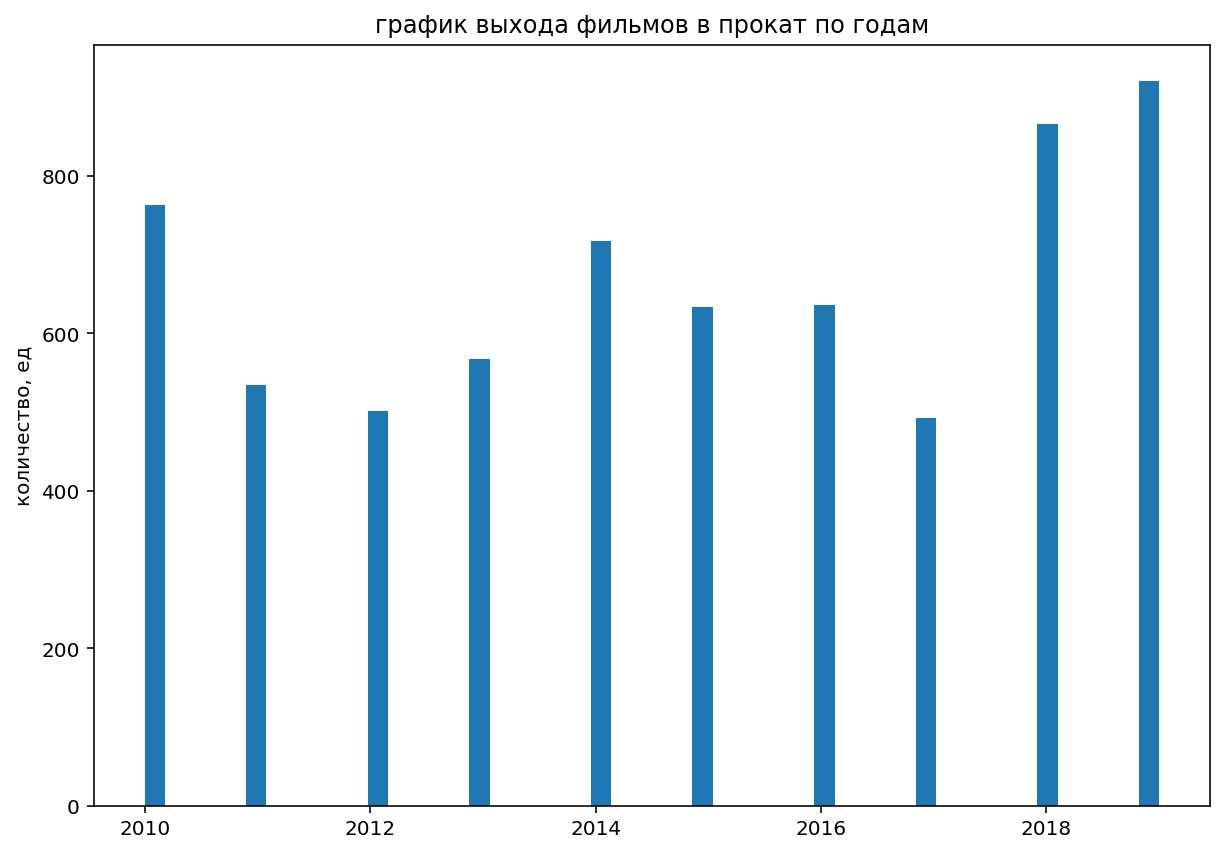

In [54]:
plt.figure(figsize=(10,7))
plt.hist(df_all['year'],bins=50)
plt.title('график выхода фильмов в прокат по годам')
plt.ylabel('количество, ед')
plt.show()

In [55]:
round(df_all['box_office'].count() /len(df_all),2)#доля фильмов у которых известен их кассовый сбор от общего числа

0.45

Мы видим, что в киноиндустрии были как увеличение выхода картин, так и уменьшение, причем резкое падение пришлось на 2011 год, а совсем упало в 2012, затем поднялось в 2014 и снова упало к 2017, зато в 2018 был резкий взлет

- Изучим, как менялась динамика проката по годам.

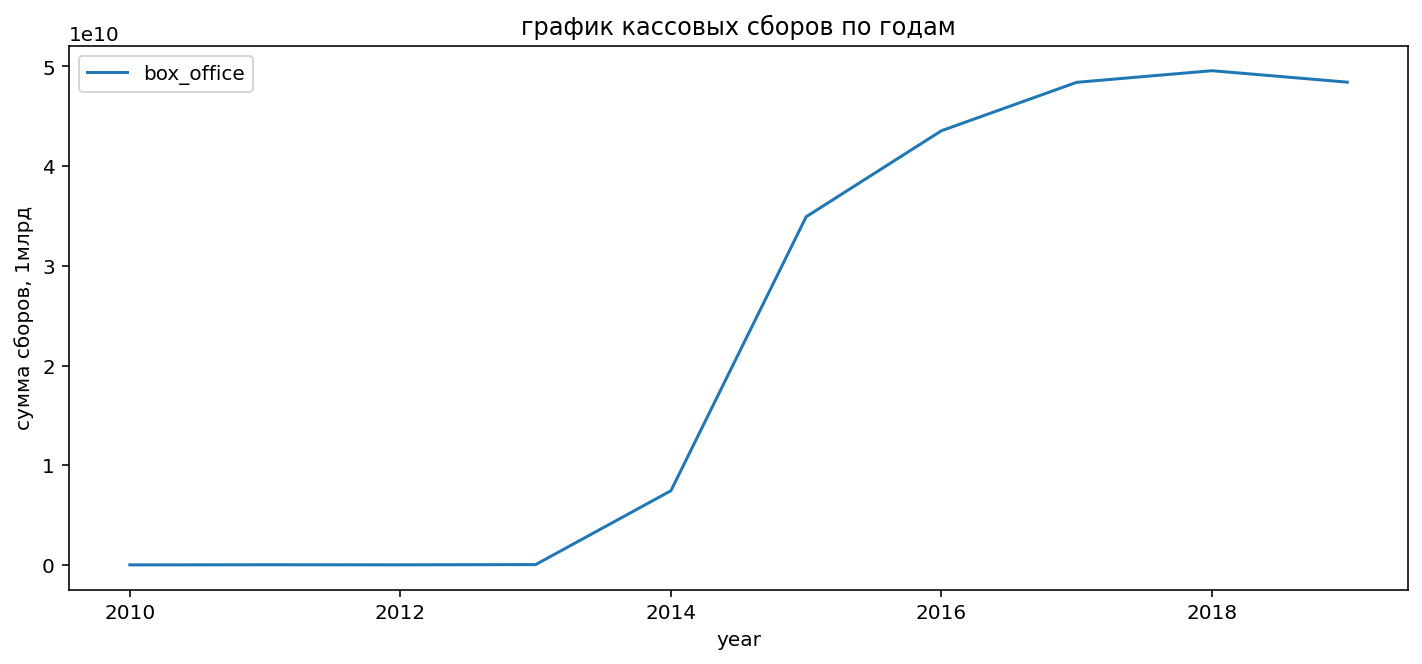

In [56]:
df_all.groupby('year').agg({'box_office':'sum'}).plot(figsize=(12,5),title='график кассовых сборов по годам',ylabel='сумма сборов, 1млрд')
plt.show()

До 2013 года кассовые сборы не доходили до 1млрд рублей, а вот в 2013 начинается рост сборов вплоть до максимального значения в 50 млрд 2018 году.

In [57]:
df_all[df_all['year']<=2013].groupby('year').agg({'box_office':'sum'}).sort_values(by='box_office')

,box_office
year,
2010,529500.0
2012,5862754.0
2011,13817084.0
2013,29264049.7


Как видим минимальное значение было в 2010 году и составляло 529500 т.р.

- посчитаем среднюю и медианную сумму сборов для каждого года.

In [58]:
df_box = df_all.groupby('year').agg({'box_office':['mean','median']})

In [59]:
df_box.columns=['mean','median']

In [60]:
df_box/1000000 #выразим в миллионах для наглядности

,mean,median
year,,
2010,0.006877,0.001240
2011,0.142444,0.003000
2012,0.053298,0.003620
2013,0.171135,0.003450
2014,28.394318,0.019915
2015,77.613010,4.777096
2016,89.618065,4.683780
2017,137.531416,10.177834
2018,105.479030,9.100674


Мы видим, что до 2013 года среднее значение было примерно на одном уровне, а в 2014 году произошел скачек с последующим ростом до 2018 года, в то время как медиана расла не так уверенно и очень сильно отличается от среднего. Скорей всего это говорит о том, что есть некоторые фильмы в каждом году у которых кассовый сбор составил очень большое значение гораздо выше остальных. Посмотрим на них в 2017 году.

Посмотрим на фильмы вышедшие в 2017 году

In [61]:
df_all[(df_all['year']==2017) & (~df_all['box_office'].isna())]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genres,budget_fraction
3220,кухня. последняя битва,111001517,2017-03-22 12:00:00+00:00,художественный,"ООО Кинокомпания ""Аврора продакшнс"" по заказу ...",россия,А.Федотов,"Э.Илоян, В.Шляппо, Д.Жалинский, А.Троцюк, А.Ку...",«12+» - для детей старше 12 лет,50000000.0,0.0,162630398.0,Фонд кино,6.0,комедия,3.340074e+08,2017,А.Федотов,комедия,0.31
3230,лекарство от здоровья,121001217,2017-02-01 12:00:00+00:00,художественный,"Ридженси Энтерпрайзис, Нью Ридженси Продакшнз,...",сша - германия,Гор Вербински,"Гор Вербински, Дэвид Крокетт, Арнон Милчан",«18+» - запрещено для детей,0.0,0.0,0.0,Uknown,6.3,"ужасы,фантастика,фэнтези",2.021034e+08,2017,Гор Вербински,ужасы,NaN
3231,босс-молокосос,124000317,2017-02-09 12:00:00+00:00,анимационный,ДримУоркс Анимейшн,сша,Том МакГрат,Рэмси Энн Наито,«6+» - для детей старше 6 лет,0.0,0.0,0.0,Uknown,6.5,"мультфильм,комедия,приключения",1.376727e+09,2017,Том МакГрат,мультфильм,NaN
3232,скрижали судьбы,121002417,2017-02-10 12:00:00+00:00,художественный,"Айриш Филм Боад, Аполло Медиа, Фёрндейл Филмз",ирландия,Джим Шеридан,"Роб Куигли, Ноэль Пирсон",«16+» - для детей старше 16 лет,0.0,0.0,0.0,Uknown,6.9,"драма,мелодрама",2.204898e+06,2017,Джим Шеридан,драма,NaN
3233,манчестер у моря,121004417,2017-03-14 12:00:00+00:00,художественный,"Амазон Студиос, Ка Период Медиа, Перл Стрит Фи...",сша,Кеннет Лонерган,"Лорен Бек, Мэтт Дэймон, Крис Мур",«18+» - запрещено для детей,0.0,0.0,0.0,Uknown,7.3,драма,1.038733e+07,2017,Кеннет Лонерган,драма,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5648,три богатыря и принцесса египта,114003317,2017-12-21 12:00:00+00:00,анимационный,"ООО ""Студия анимационного кино ""Мельница""",россия,К.Феоктистов,"С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,50000000.0,0.0,174464395.0,Фонд кино,5.5,"мультфильм,приключения,семейный",7.592268e+08,2017,К.Феоктистов,мультфильм,0.29
5649,мой любимый динозавр,121027217,2017-12-28 12:00:00+00:00,художественный,Хайв Студиос Интернэйшнл,австралия,Мэтт Драммонд,"Мэтт Драммонд, Меган Уильямс",«6+» - для детей старше 6 лет,0.0,0.0,0.0,Uknown,4.8,"боевик,приключения,семейный",1.773807e+06,2017,Мэтт Драммонд,боевик,NaN
5652,со дна вершины,111012017,2017-12-27 12:00:00+00:00,художественный,"ООО ""Продюсерский центр ""АЛЬТАИР-Ц""",россия,"Я.Поляруш, Т.Цоцория, К.Кутуев при участии М.А...","Т.Цоцория, Р.Витрянюк, К.Кутуев, А.Царик",«12+» - для детей старше 12 лет,0.0,30000000.0,80000000.0,Министерство культуры,6.7,"драма,спорт",3.015617e+07,2017,Я.Поляруш,драма,0.38
5654,молодая женщина,121028017,2017-12-28 12:00:00+00:00,художественный,"Блю Мондьё Продюксьон, Национальный центр кине...",франция,Леонор Серай,"Бертран Гор, Натали Мезюре, Сандра дэ Фонсека",«18+» - запрещено для детей,0.0,0.0,0.0,Uknown,6.0,"драма,комедия",2.638395e+06,2017,Леонор Серай,драма,NaN


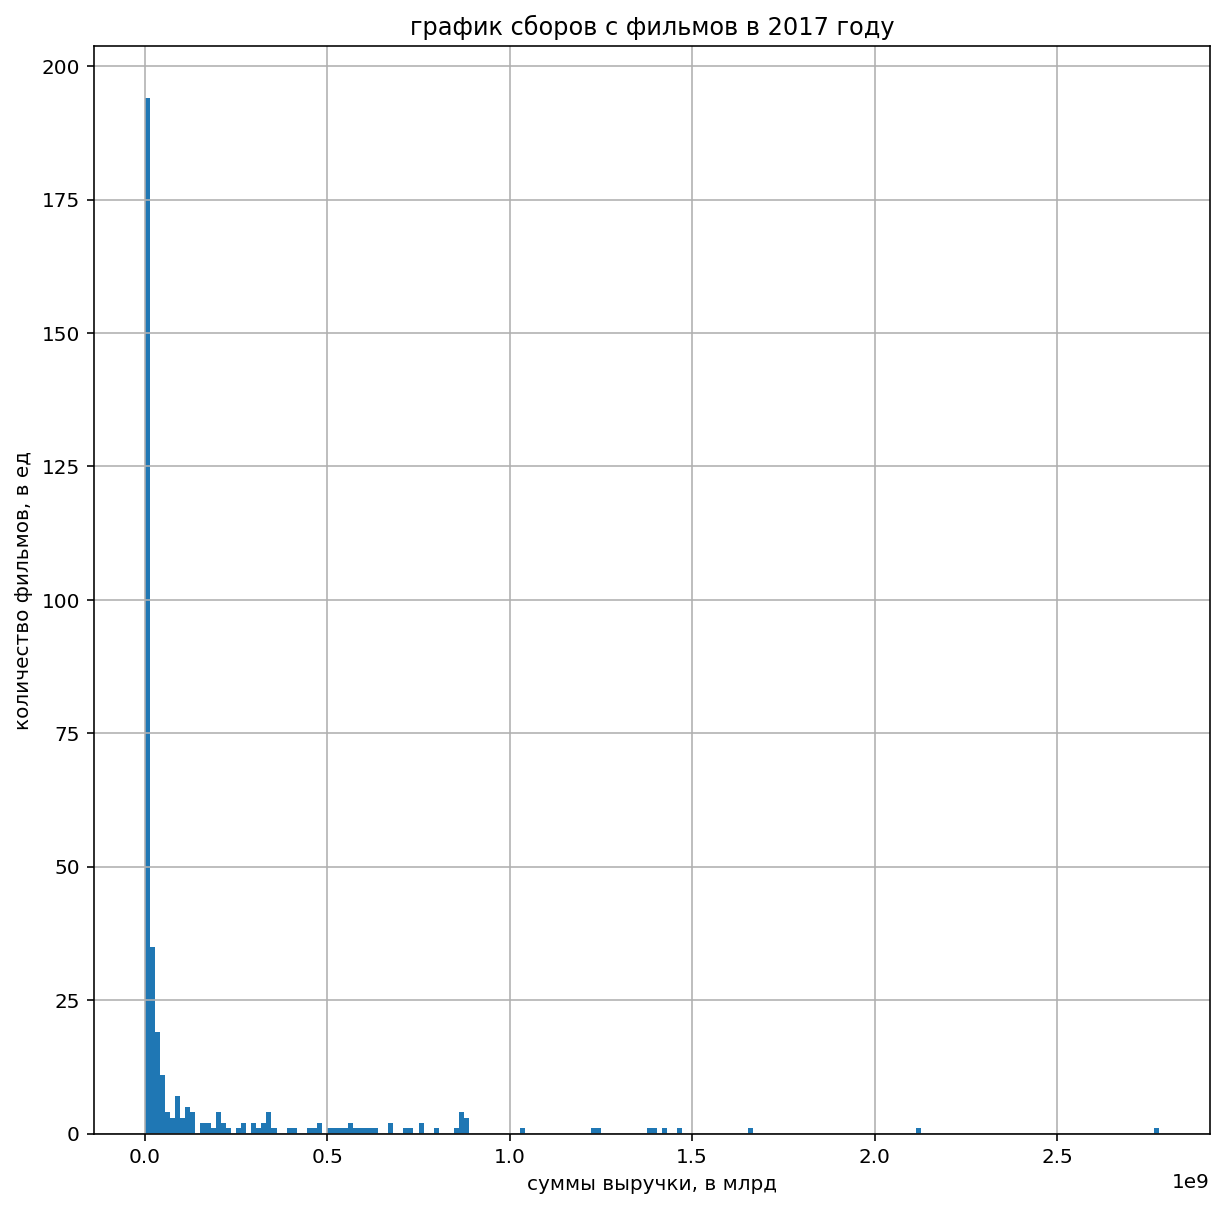

In [62]:
plt.figure(figsize=(10, 10))
plt.hist(df_all[(df_all['year']==2017) & (~df_all['box_office'].isna())].\
         sort_values(by='box_office',ascending=False)['box_office'], bins=200)
plt.title('график сборов с фильмов в 2017 году')
plt.xlabel('суммы выручки, в млрд')
plt.ylabel('количество фильмов, в ед')
plt.grid()

plt.show()

Чтож поистине очень плодотворный год, начинают его малоизвестные фильмы индии, польщи, казахстана и заканчивают крайне известные: движение вверх, пираты корибкого моря, последний богатырь стражи галктики, соответственно и разбег по средней цене будет колоссальным, что и требовалось доказать

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год?

Построим график зависимости выручки в прокате от даты проката и группы

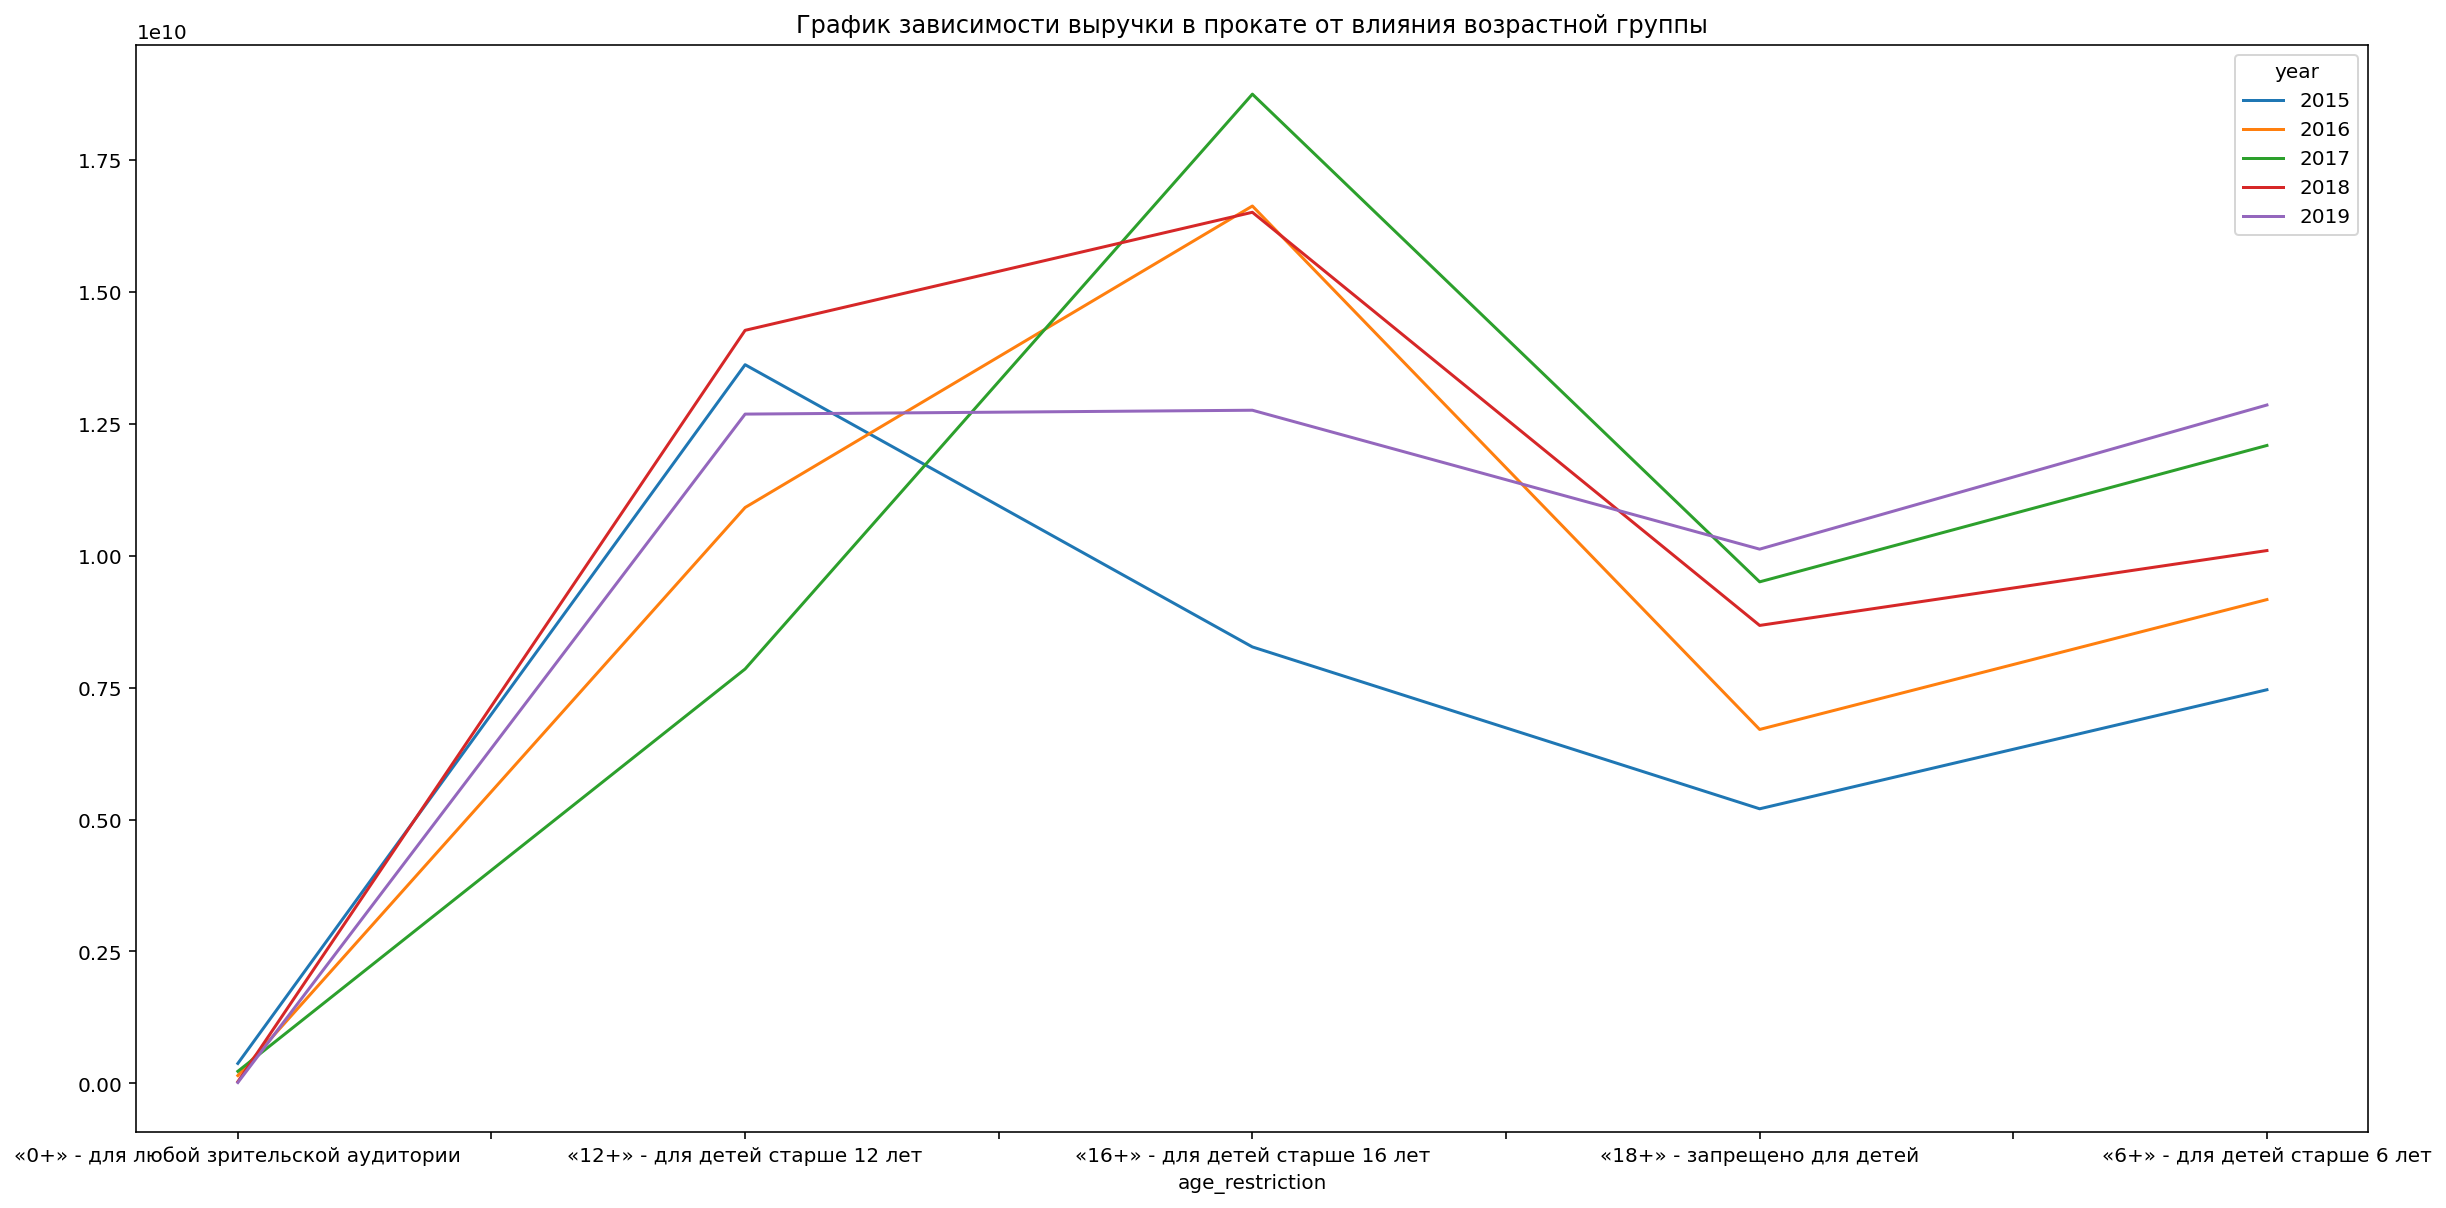

In [63]:
df_all[(df_all['year']>=2015) & (df_all['year']<=2019)].pivot_table(index='age_restriction',\
columns='year',values='box_office', aggfunc='sum').plot(figsize=(20,10), title ='График зависимости выручки в прокате от влияния возрастной группы')
plt.show()

создадим срез новой таблицы и посмотрим на пропущенные значения именно в ней

In [64]:
df_year = df_all[(df_all['year']>=2015) & (df_all['year']<=2019)]

In [65]:
pd.DataFrame(round((df_year.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
title,0.000000
pu_number,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
producer,5.690000
age_restriction,0.000000
refundable_support,0.000000


Мы видим, что в годах 2015-2019 приходится 35% пропусков, чтобы правильно провести анализ, посчитаем сначала заполненые значения в столбце box_office, затем заполним пропуски значением -1 и снова посчитаем, после этого вычислим долю заполненых значений.

In [66]:
df_2 = (df_year.pivot_table(index='age_restriction',columns='year',values='box_office', aggfunc='count'))

In [67]:
df_year['box_office'] = df_year['box_office'].fillna(-1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
pd.DataFrame(round((df_year.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
title,0.000000
pu_number,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
producer,5.690000
age_restriction,0.000000
refundable_support,0.000000


In [69]:
df_3 = df_year.pivot_table(index='age_restriction',columns='year',values='box_office', aggfunc='count')
df_2

year,2015,2016,2017,2018,2019
age_restriction,,,,,
«0+» - для любой зрительской аудитории,38,35,3,5,3
«12+» - для детей старше 12 лет,73,75,41,66,85
«16+» - для детей старше 16 лет,162,167,119,156,178
«18+» - запрещено для детей,128,146,144,177,183
«6+» - для детей старше 6 лет,49,63,45,66,81


In [70]:
df_3

year,2015,2016,2017,2018,2019
age_restriction,,,,,
«0+» - для любой зрительской аудитории,48,59,43,77,73
«12+» - для детей старше 12 лет,133,123,70,232,202
«16+» - для детей старше 16 лет,223,198,149,231,262
«18+» - запрещено для детей,158,174,166,216,252
«6+» - для детей старше 6 лет,72,82,65,110,132


In [71]:
df_pass = (df_2 / df_3 * 100).round(2)
df_pass #процент заполнения датафрейма по годам и группам

year,2015,2016,2017,2018,2019
age_restriction,,,,,
«0+» - для любой зрительской аудитории,79.17,59.32,6.98,6.49,4.11
«12+» - для детей старше 12 лет,54.89,60.98,58.57,28.45,42.08
«16+» - для детей старше 16 лет,72.65,84.34,79.87,67.53,67.94
«18+» - запрещено для детей,81.01,83.91,86.75,81.94,72.62
«6+» - для детей старше 6 лет,68.06,76.83,69.23,60.00,61.36


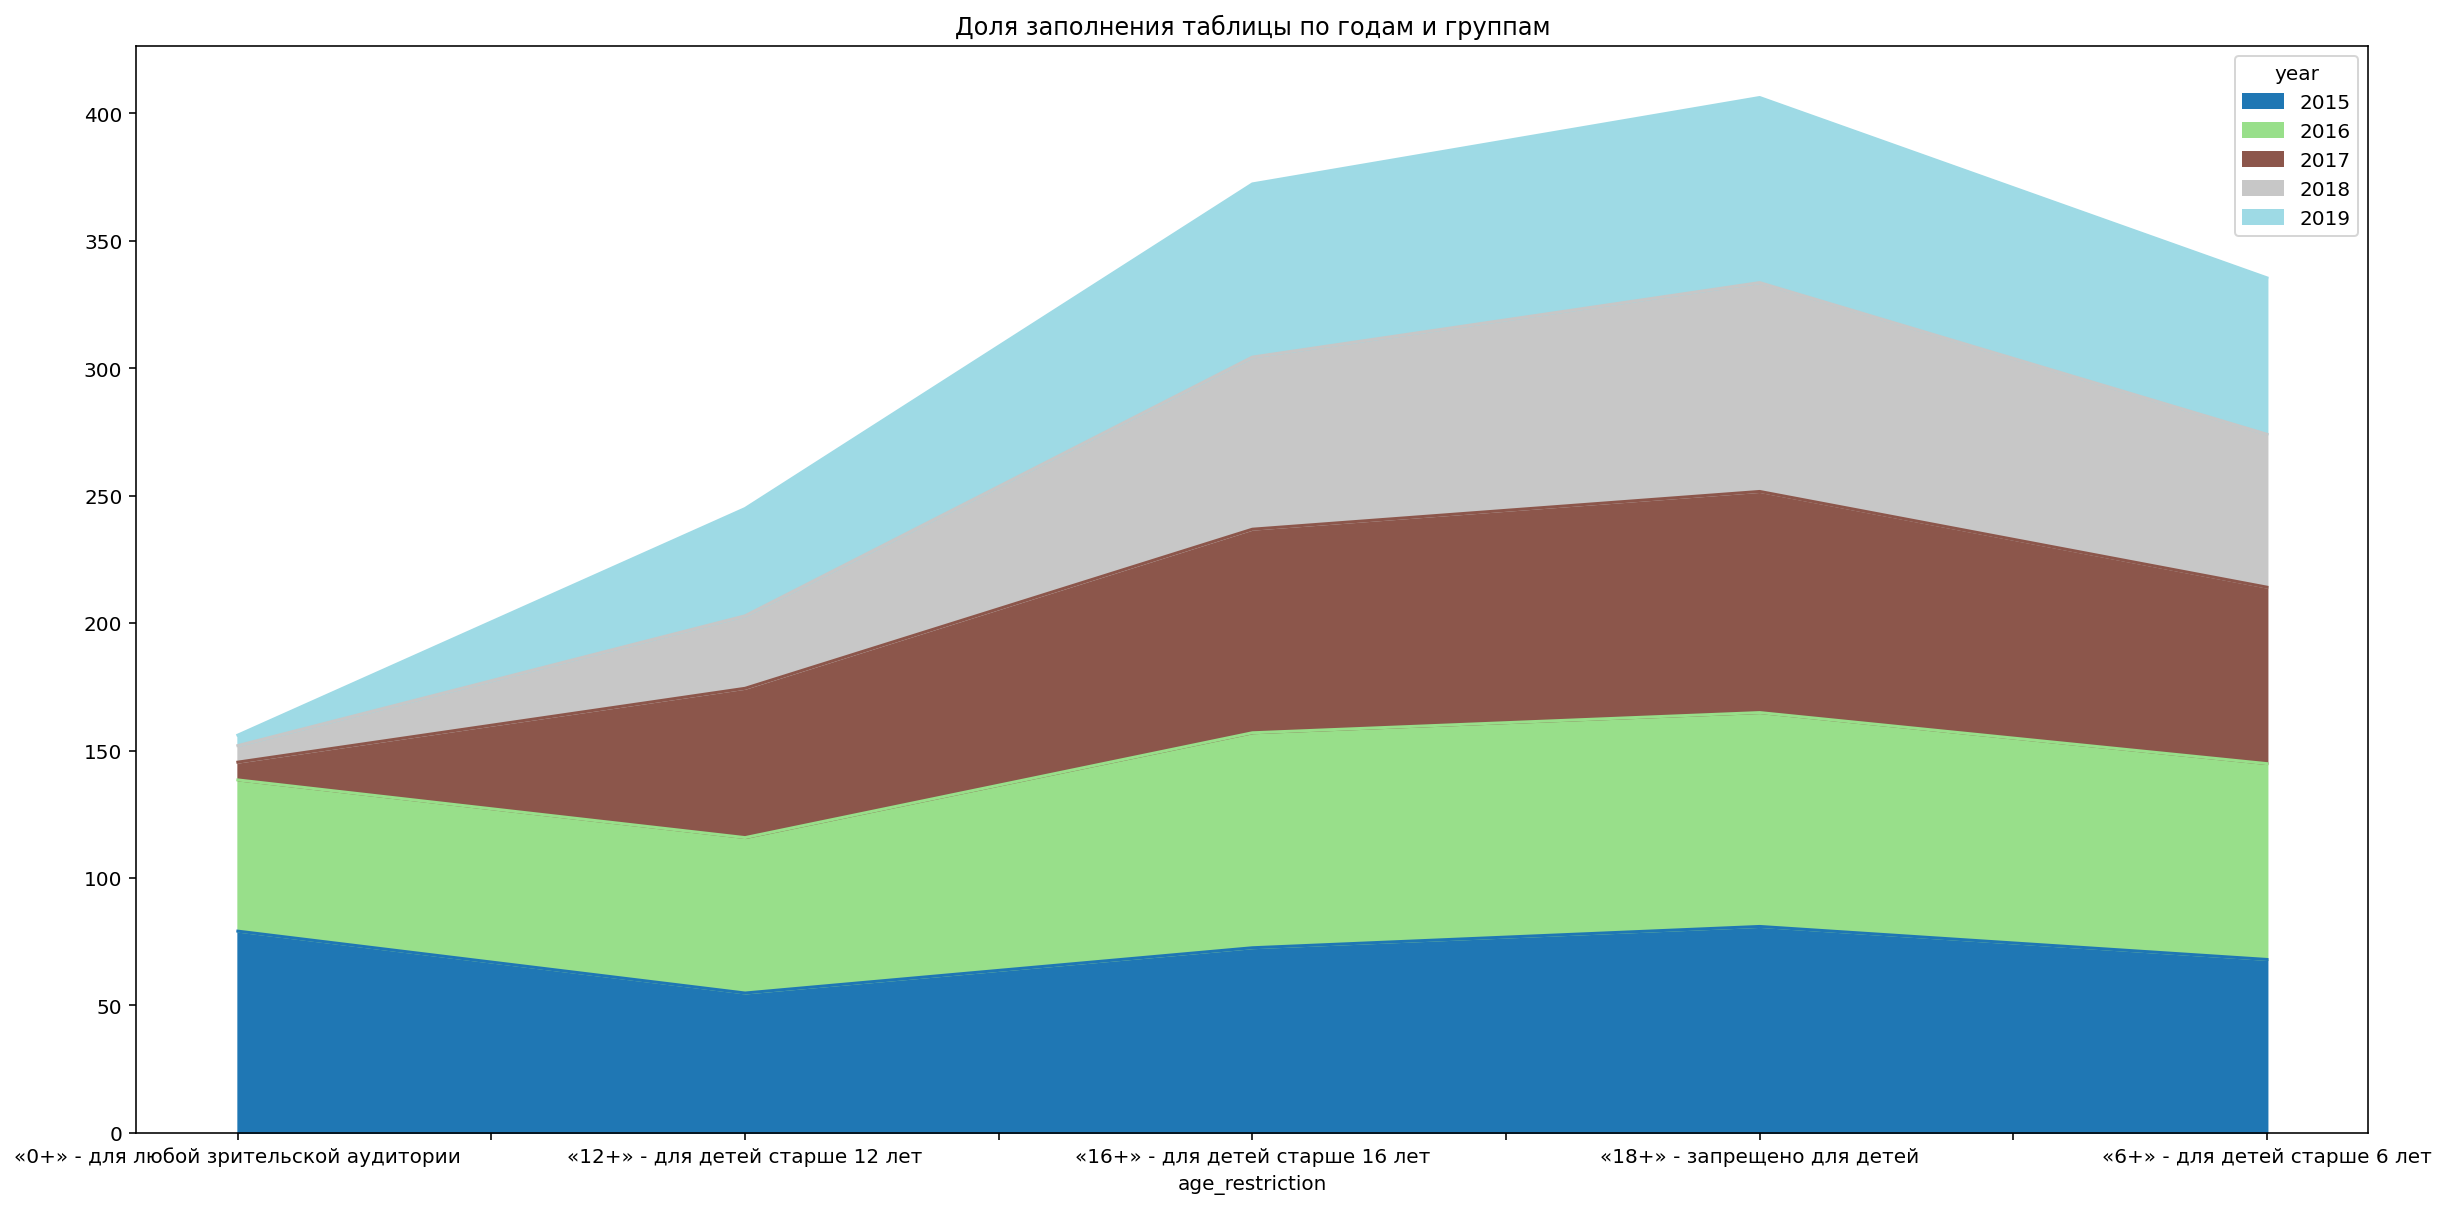

In [72]:
df_pass.plot(
    kind='area',
    figsize=(20, 10),
    colormap='tab20',
    title='Доля заполнения таблицы по годам и группам',
    )
plt.show()

В принципе мы видим зависимость выручки от заполнения пропущенных значений в таблице, но создадим еще график зависимости.

In [73]:
df_1 = df_year.pivot_table(index='age_restriction',columns='year',values='box_office', aggfunc='sum')
df_group = df_1.merge(df_pass, on='age_restriction')
df_group

year,2015_x,2016_x,2017_x,2018_x,2019_x,2015_y,2016_y,2017_y,2018_y,2019_y
age_restriction,,,,,,,,,,
«0+» - для любой зрительской аудитории,3.790532e+08,1.492248e+08,2.295989e+08,3.244893e+07,1.774600e+07,79.17,59.32,6.98,6.49,4.11
«12+» - для детей старше 12 лет,1.361608e+10,1.091063e+10,7.851428e+09,1.426725e+10,1.268020e+10,54.89,60.98,58.57,28.45,42.08
«16+» - для детей старше 16 лет,8.269512e+09,1.662215e+10,1.874145e+10,1.650360e+10,1.275342e+10,72.65,84.34,79.87,67.53,67.94
«18+» - запрещено для детей,5.202938e+09,6.706002e+09,9.502437e+09,8.676734e+09,1.012180e+10,81.01,83.91,86.75,81.94,72.62
«6+» - для детей старше 6 лет,7.458269e+09,9.166368e+09,1.208614e+10,1.009511e+10,1.285255e+10,68.06,76.83,69.23,60.00,61.36


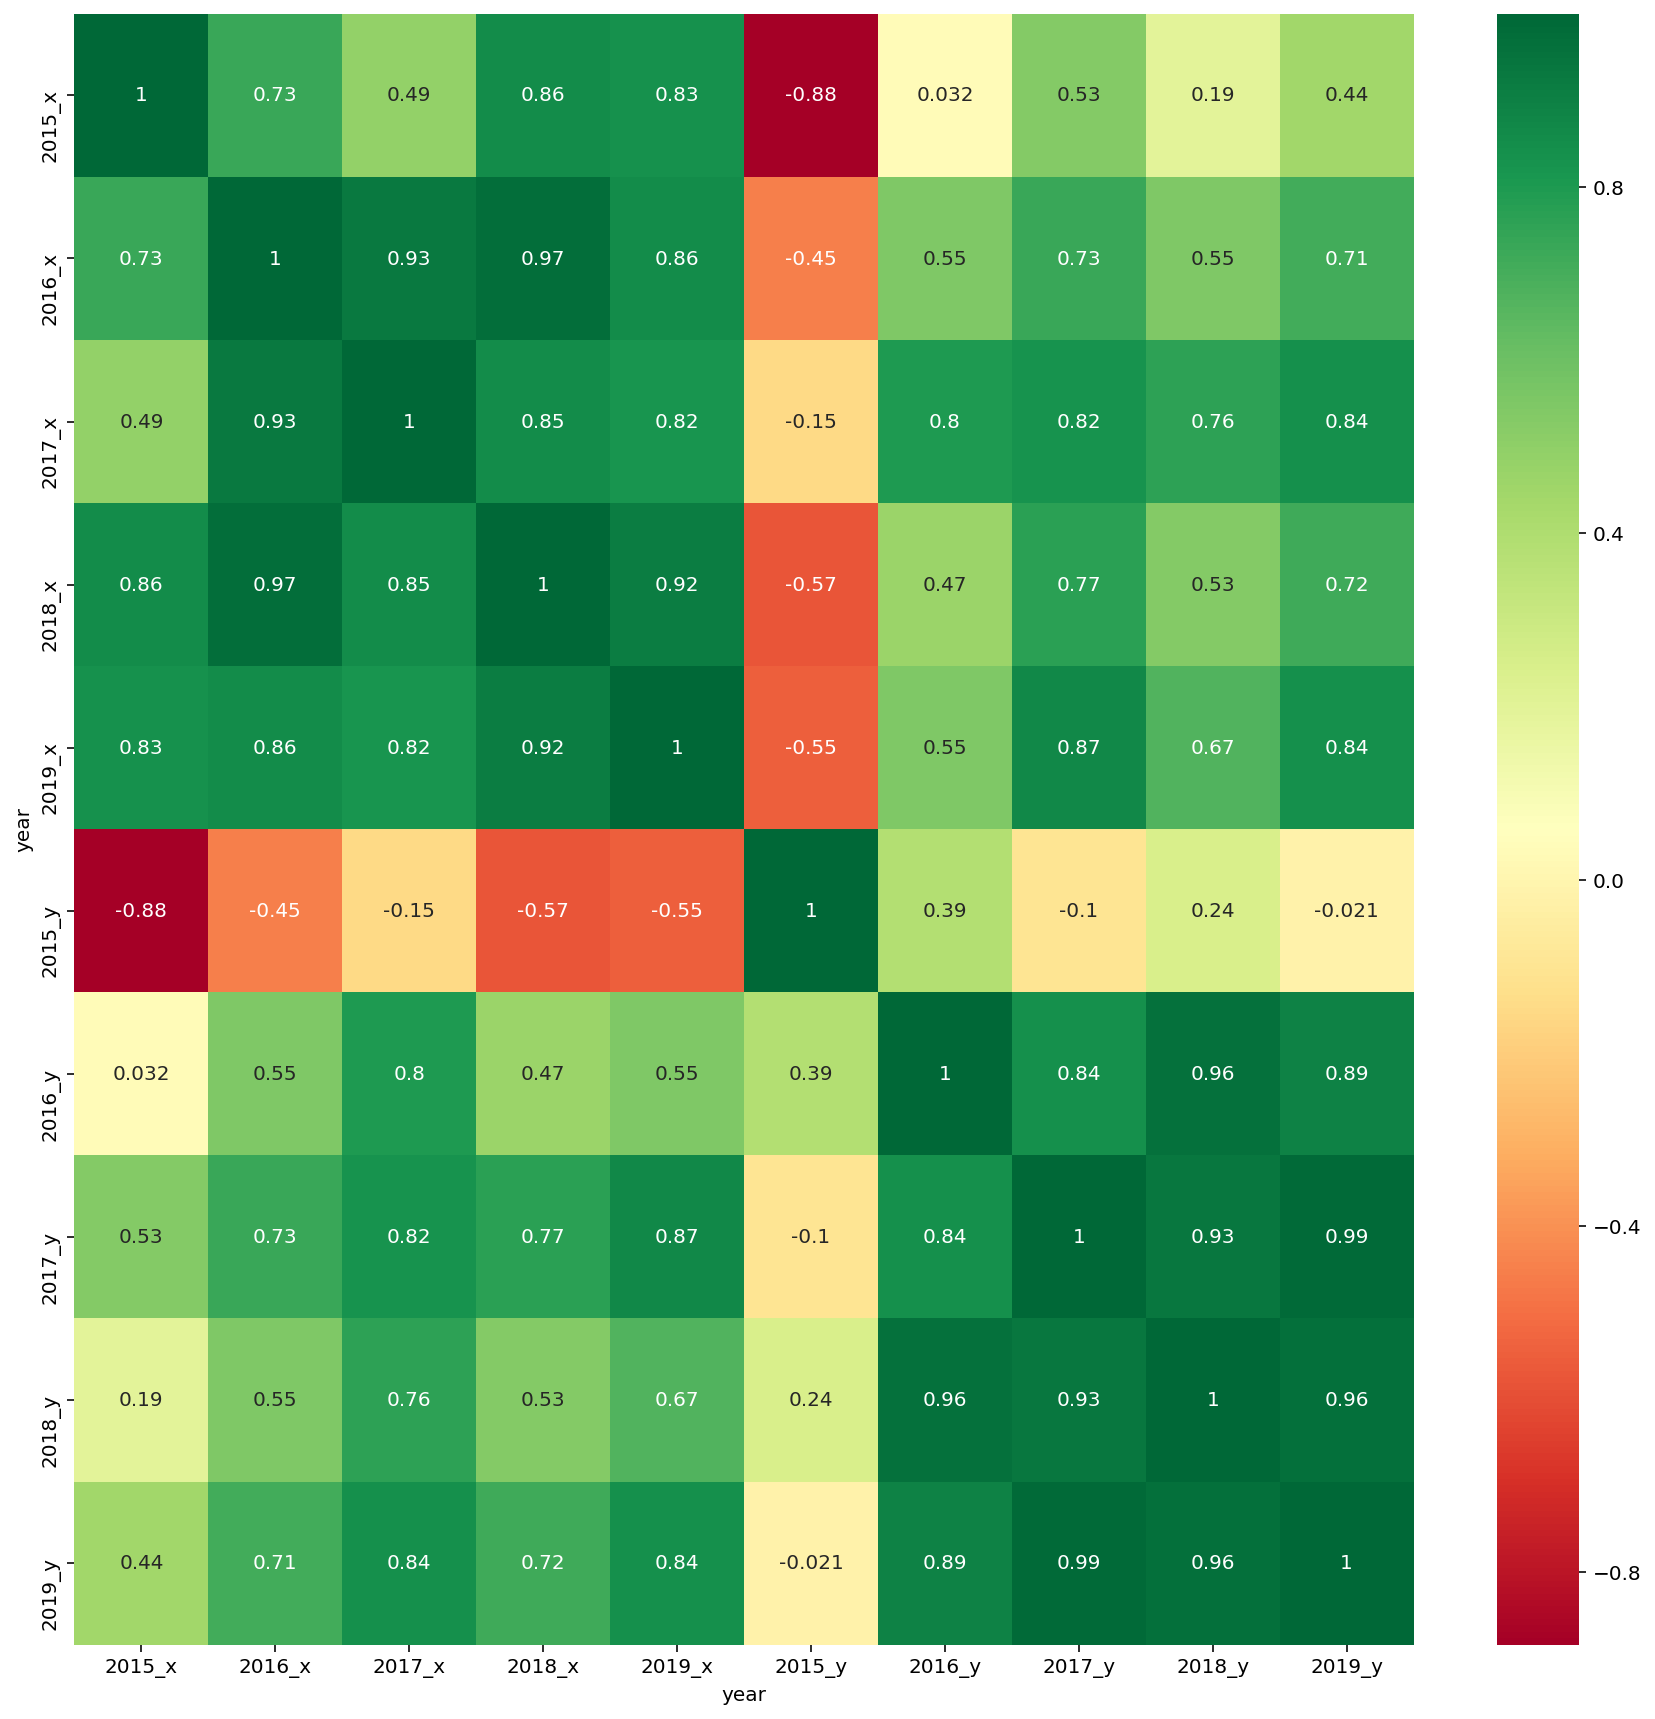

In [74]:
plt.figure(figsize=(15,15))
sns.heatmap(df_group.corr(), annot=True, cmap='RdYlGn')
plt.show()

Выведем все графики вместе

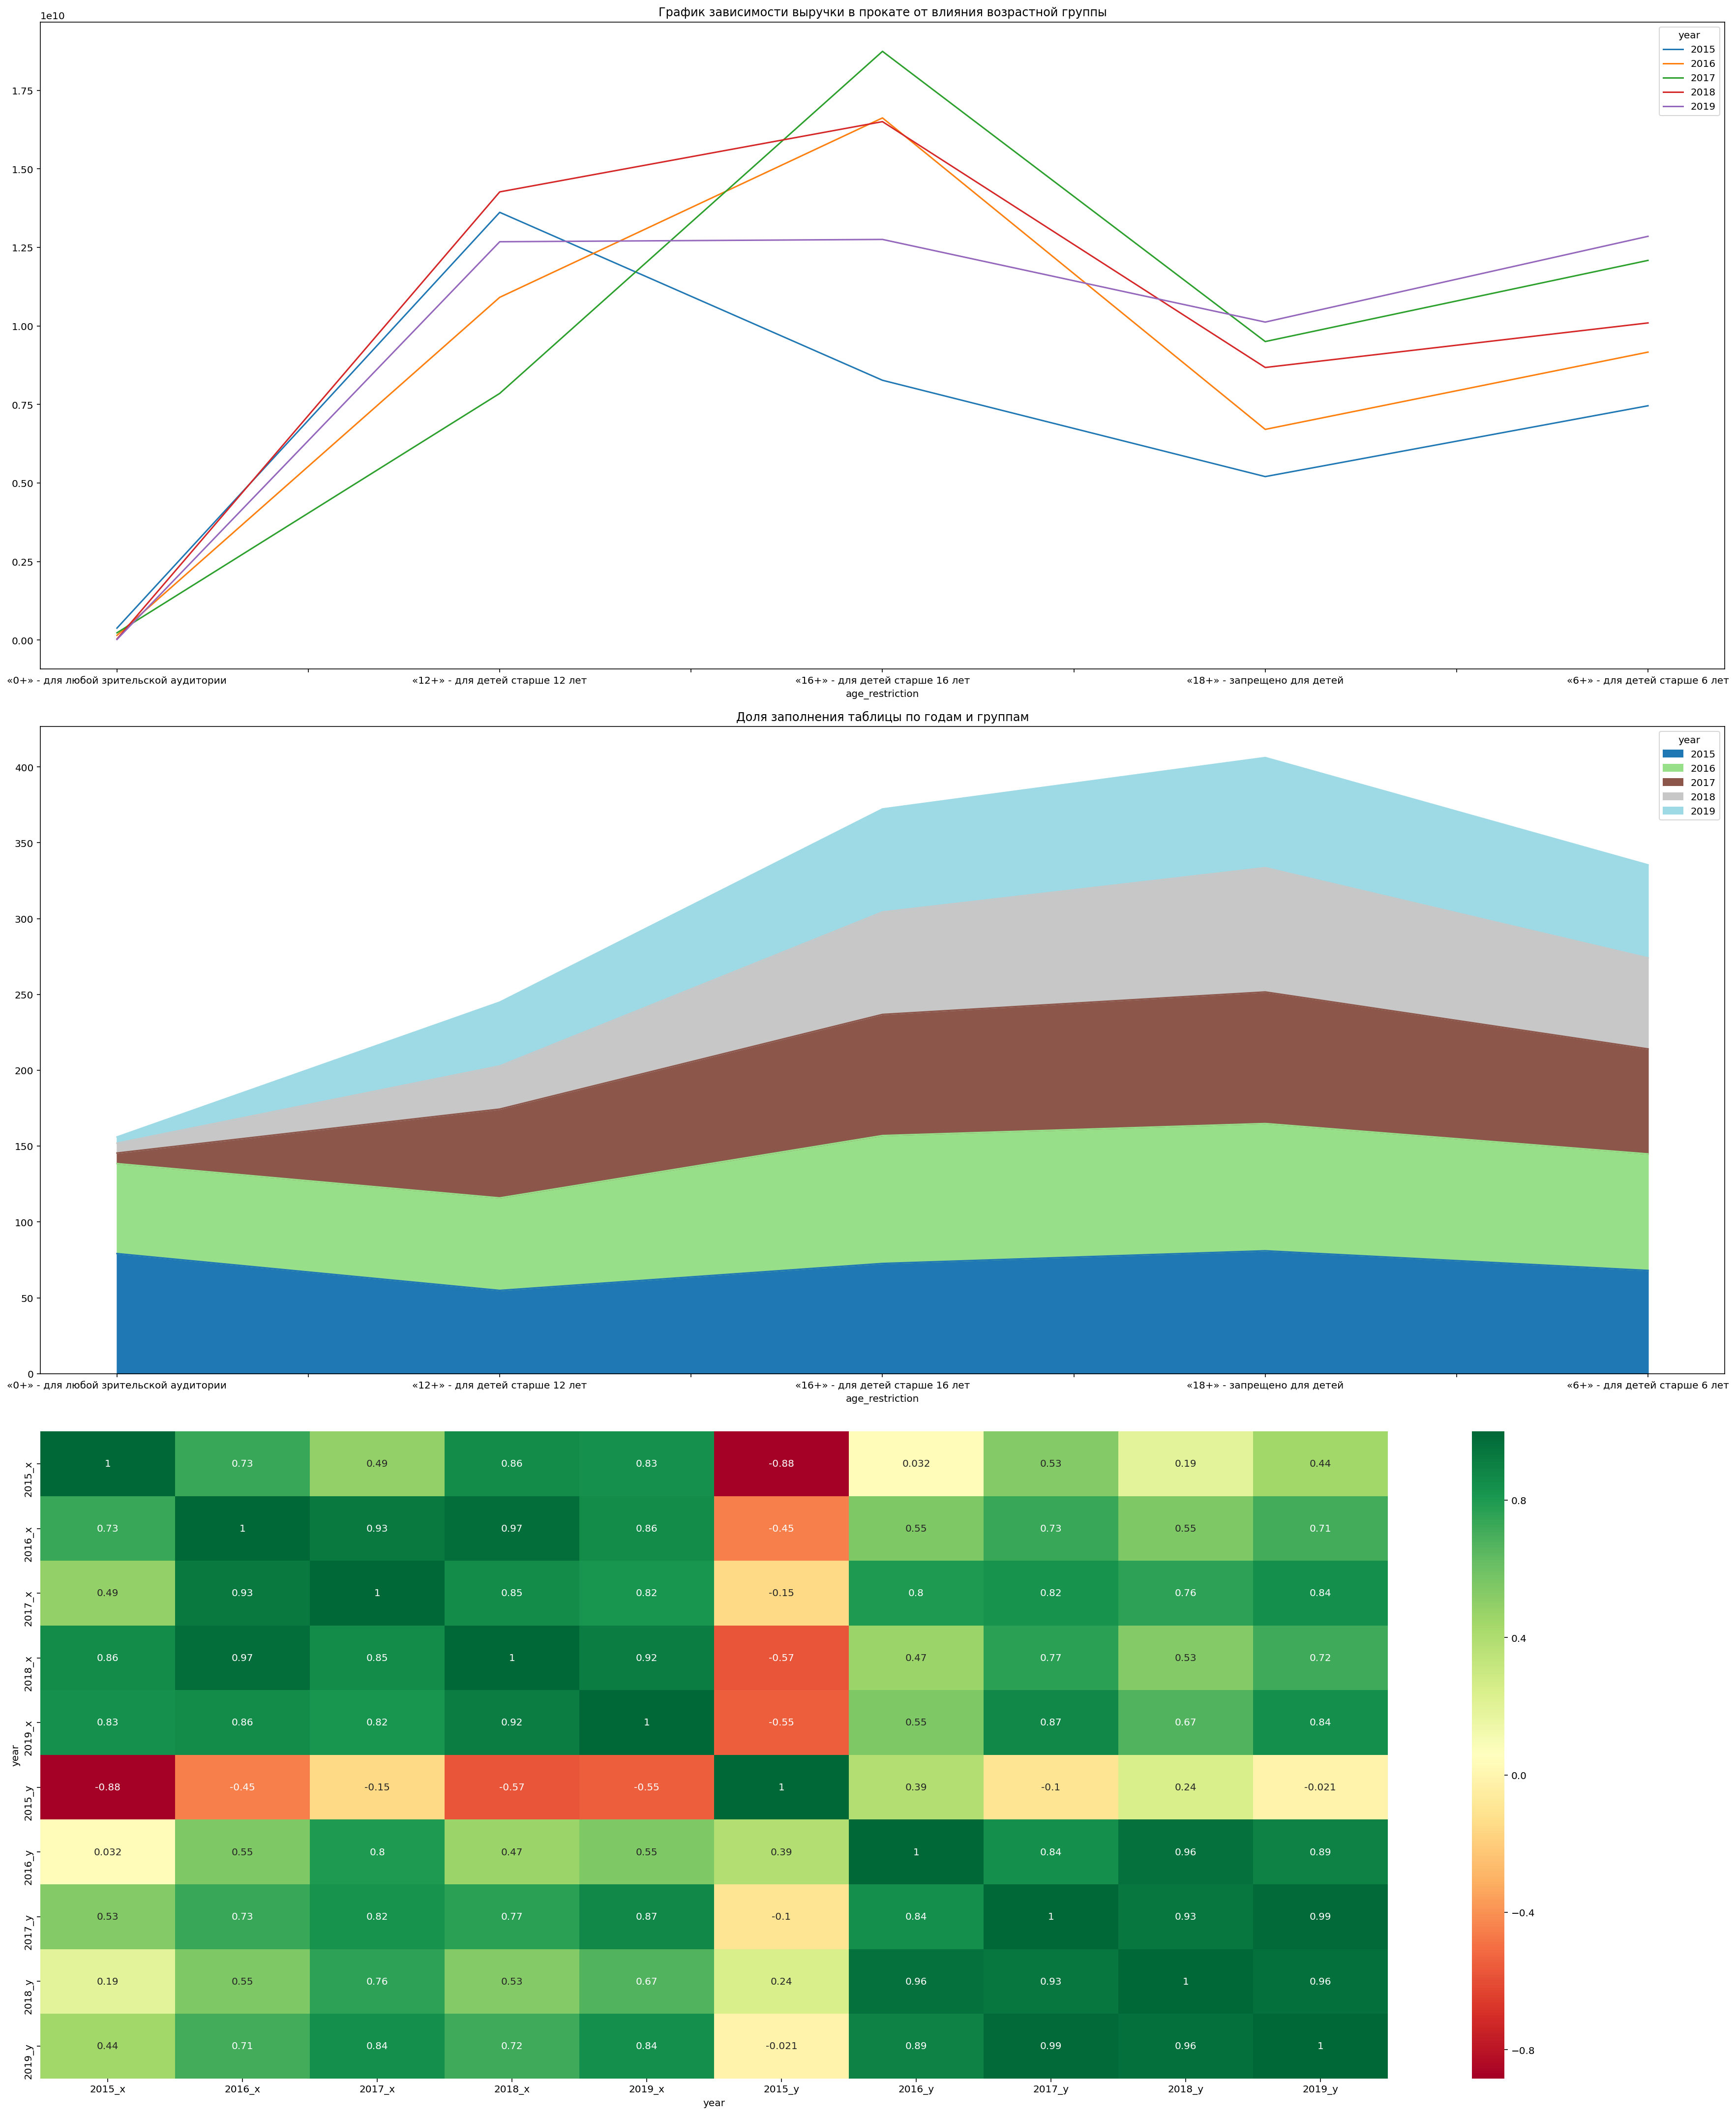

In [75]:
fig = plt.figure(figsize=(25, 30))

ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)


df_all[(df_all['year']>=2015) & (df_all['year']<=2019)]\
.pivot_table(index='age_restriction',columns='year',values='box_office', aggfunc='sum')\
.plot(title ='График зависимости выручки в прокате от влияния возрастной группы', ax=ax1)
   
df_pass.plot(
    kind='area',
    colormap='tab20',
    title='Доля заполнения таблицы по годам и группам',
    ax=ax2)
sns.heatmap(df_group.corr(), annot=True, cmap='RdYlGn', ax=ax3)


fig.tight_layout()

Мы представили прибыль в киноиндустрии сначала по сумме сборов, затем по доле заполнения таблицы в каждой категории и нашли зависимость между заполнением таблицы и выручкой, что в принципе логично. Мы видим, что в категории 0+ все что приходится на 2017-2019 года заполнены буквально на 4%, что для полноценного анализа очень мало и к тому же выручка так же находится гораздо ниже всех остальных групп. А вот в группе 12+ хоть и 2017 год был менее успешен чем другие, заполнен на 60%, что больше заполнения остальных лет. А вот 2018 заполнен только на 30%, хотя это никак не повлияло на то, что он является самым успешным для этой категории. Группа 16+ заполнена примерно одинаково в районе 70%, и выделяется 2017 год, ведь там вышли довольно успешные фильмы. Группа 18+ тоже заполнена примерно одинаково примерно на 80%, но ее прибыль не многим меньше прибыли группы 16+, самым успешным является 2019 год. Ну и 6+ так же заполнена примерно одинаково, вырука чуть больше группы 18+. Таким образом, мы видим, что конечно пропуски оказывают свое влияние в случае когда их сильно много как это случилось с группой 0+.

### 4. Исследуем фильмы, которые получили государственную поддержку

1. Проверим самые распространенные жанры
2. Найдем список компаний финансирующие фильмы
3. Найдем список режисссеров снимающие самые высокооплачиваемые фильмы
4. Добавим пару столбцов для удобства пользования таблицей
4. И проведем анализ, поищем закономерности

In [76]:
df_fin = df_all[df_all['financing_source']!='Uknown']#создаем таблицу с фильмами получившими господдержку
df_fin 

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genres,budget_fraction
1280,пока еще жива,111005313,2013-10-11 12:00:00+00:00,художественный,"АНО содействия развитию кинематографии ""Ангел-...",россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",3.653536e+05,2013,А.Атанесян,драма,0.33
1446,бесславные придурки,111003314,2014-03-28 12:00:00+00:00,художественный,"ООО ""Компания ""АТК-Студио""",россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,NaN,2.814000e+04,2014,А.Якимчук,None,0.70
1496,невидимки,111004213,2013-09-10 12:00:00+00:00,художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",1.995703e+07,2013,Р.Давлетьяров,комедия,0.61
1522,берцы,111004314,2014-05-05 12:00:00+00:00,художественный,"ООО ""Студия ""Пассажир""",россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,5.591750e+04,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69
1789,братья ч,111004414,2014-04-23 12:00:00+00:00,художественный,"ООО ""Студия ""Пассажир""",россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,2.321000e+05,2014,М.Угаров,драма,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7437,союз спасения,111022019,2019-12-26 12:00:00+00:00,художественный,"ЗАО ""Дирекция кино""",россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"история,биография,драма",7.177032e+08,2019,А.Кравчук,история,0.51
7439,иван царевич и серый волк 4,114005019,2019-12-20 12:00:00+00:00,анимационный,"ООО ""Студия анимационного кино ""Мельница""",россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,0.0,190000000.0,Фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08,2019,Д.Шмидт,мультфильм,0.53
7447,вторжение,111022519,2019-12-23 12:00:00+00:00,художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,0.53
7449,я свободен,111023019,2019-12-26 12:00:00+00:00,художественный,"АО ""ТПО ""Киностудия им. М.Горького""",россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,46154000.0,Министерство культуры,5.9,драма,NaN,2019,И.Северов,драма,0.65


Посмотрим на распределение выручки между жанрами

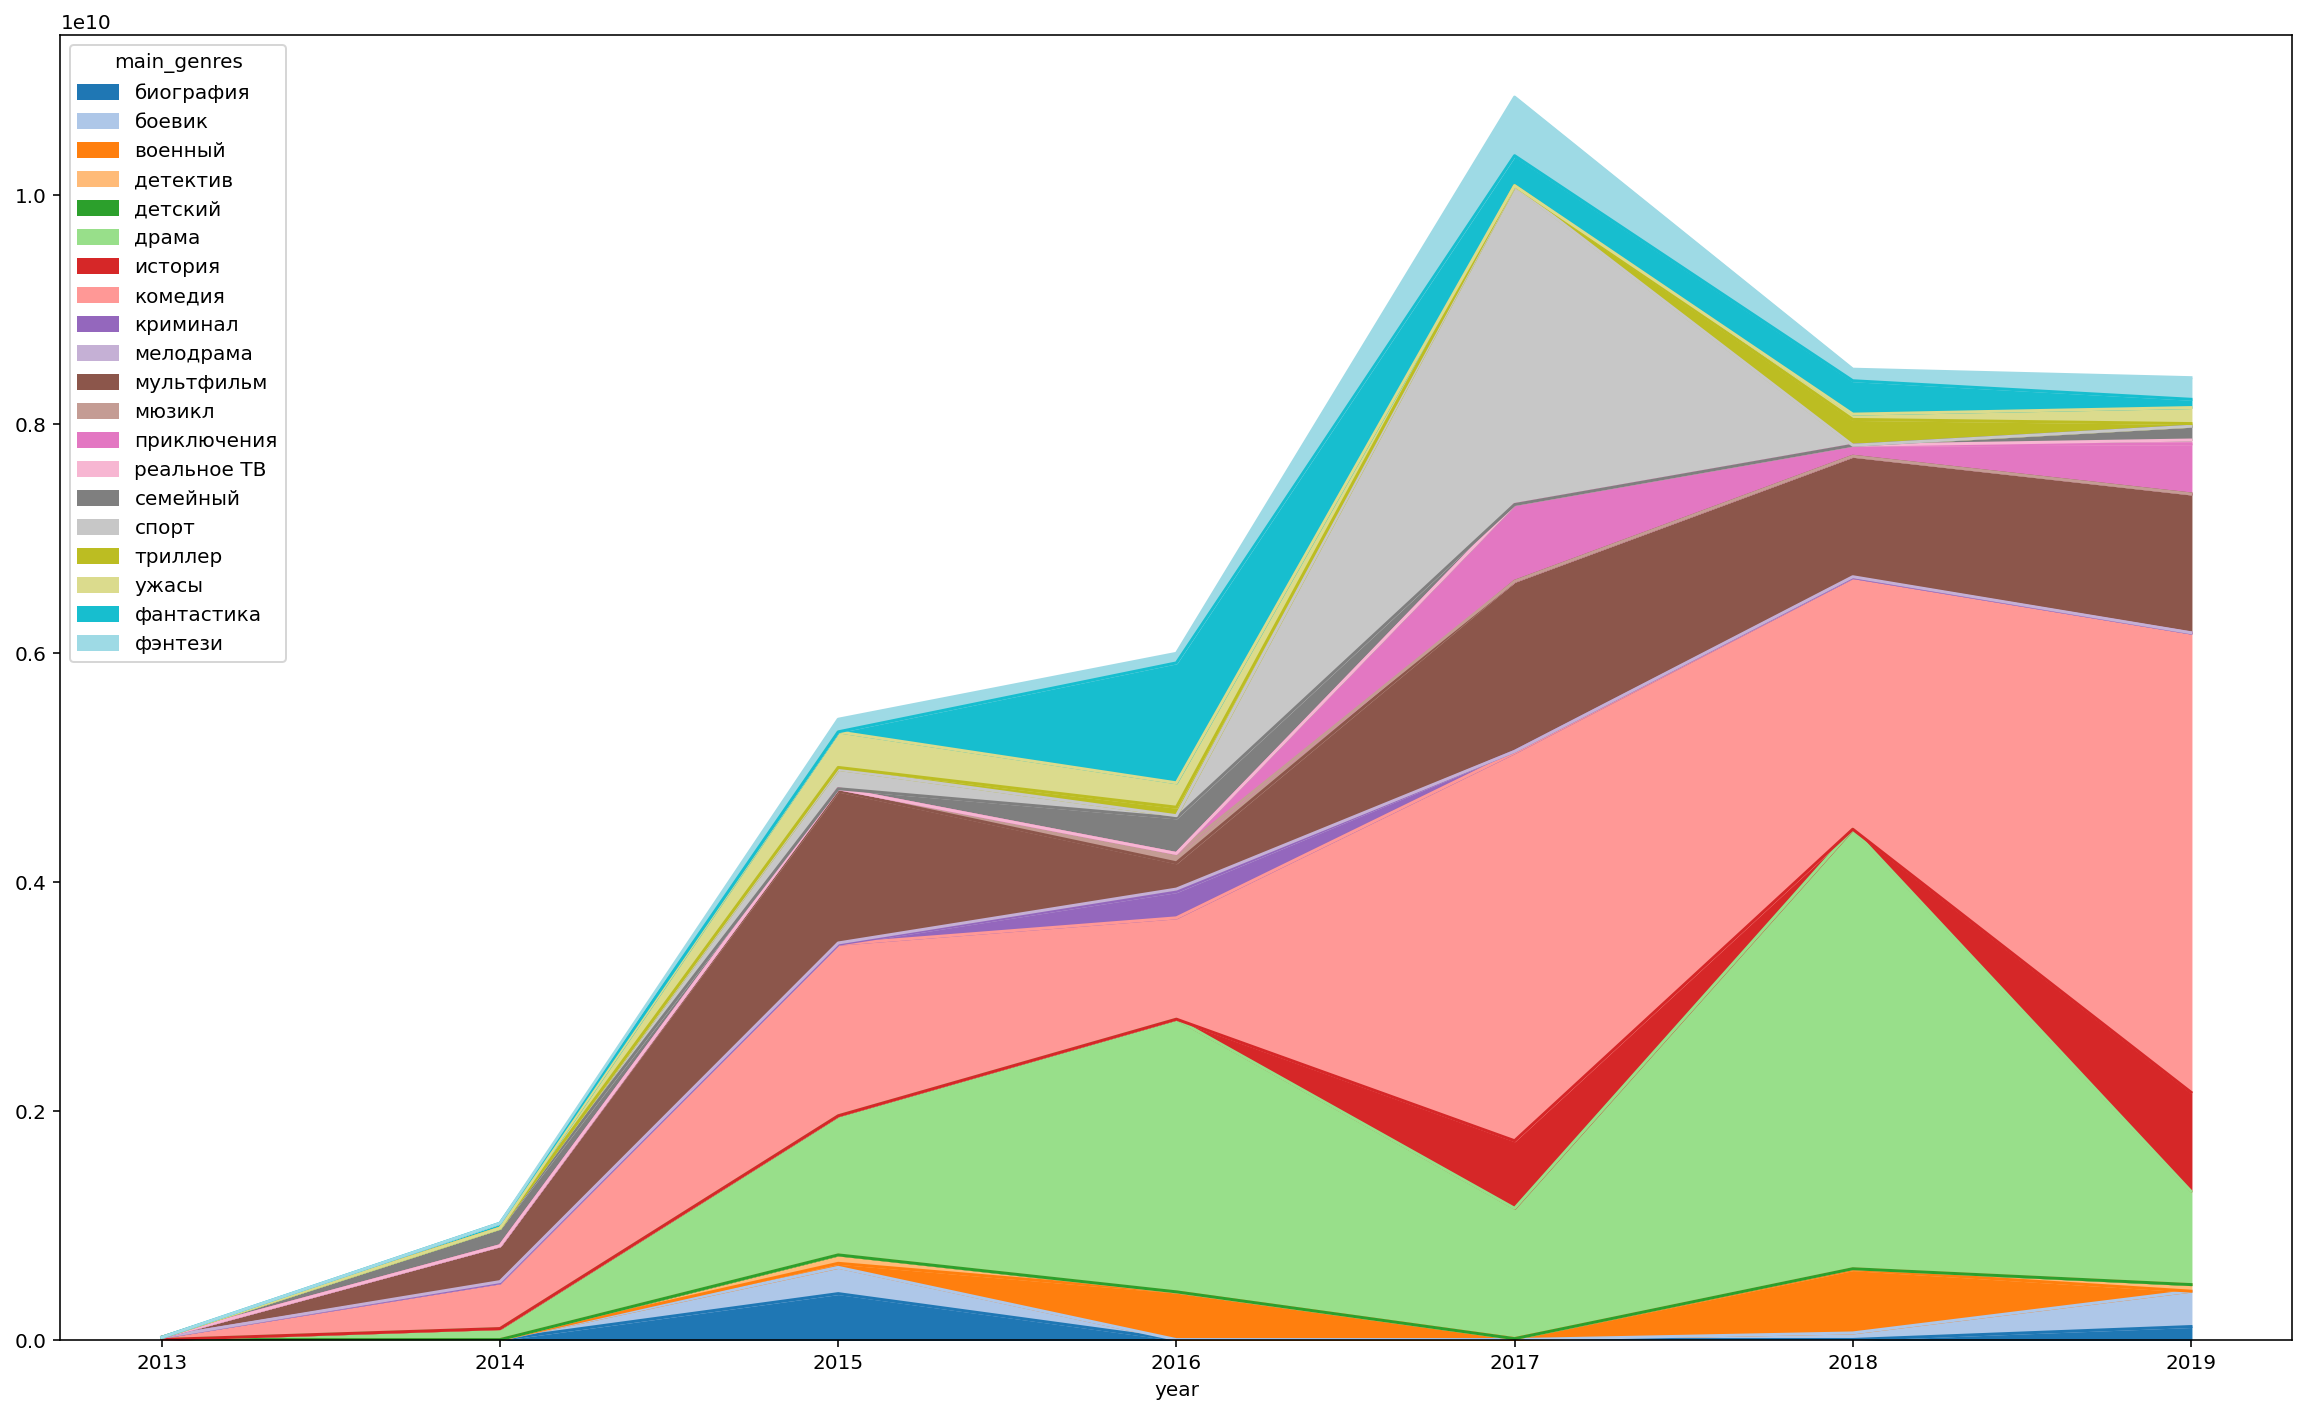

In [77]:
df_fin.pivot_table(index='year',values='box_office',columns='main_genres',aggfunc='sum').plot(kind='area',colormap='tab20',figsize=(20,12))
plt.show()

Основными жанрами приносящими прибыль являются: драма, комедия, мультфильм и отдельно в 2017 году выделялся спорт, проверим кто больше всего финансирует картины

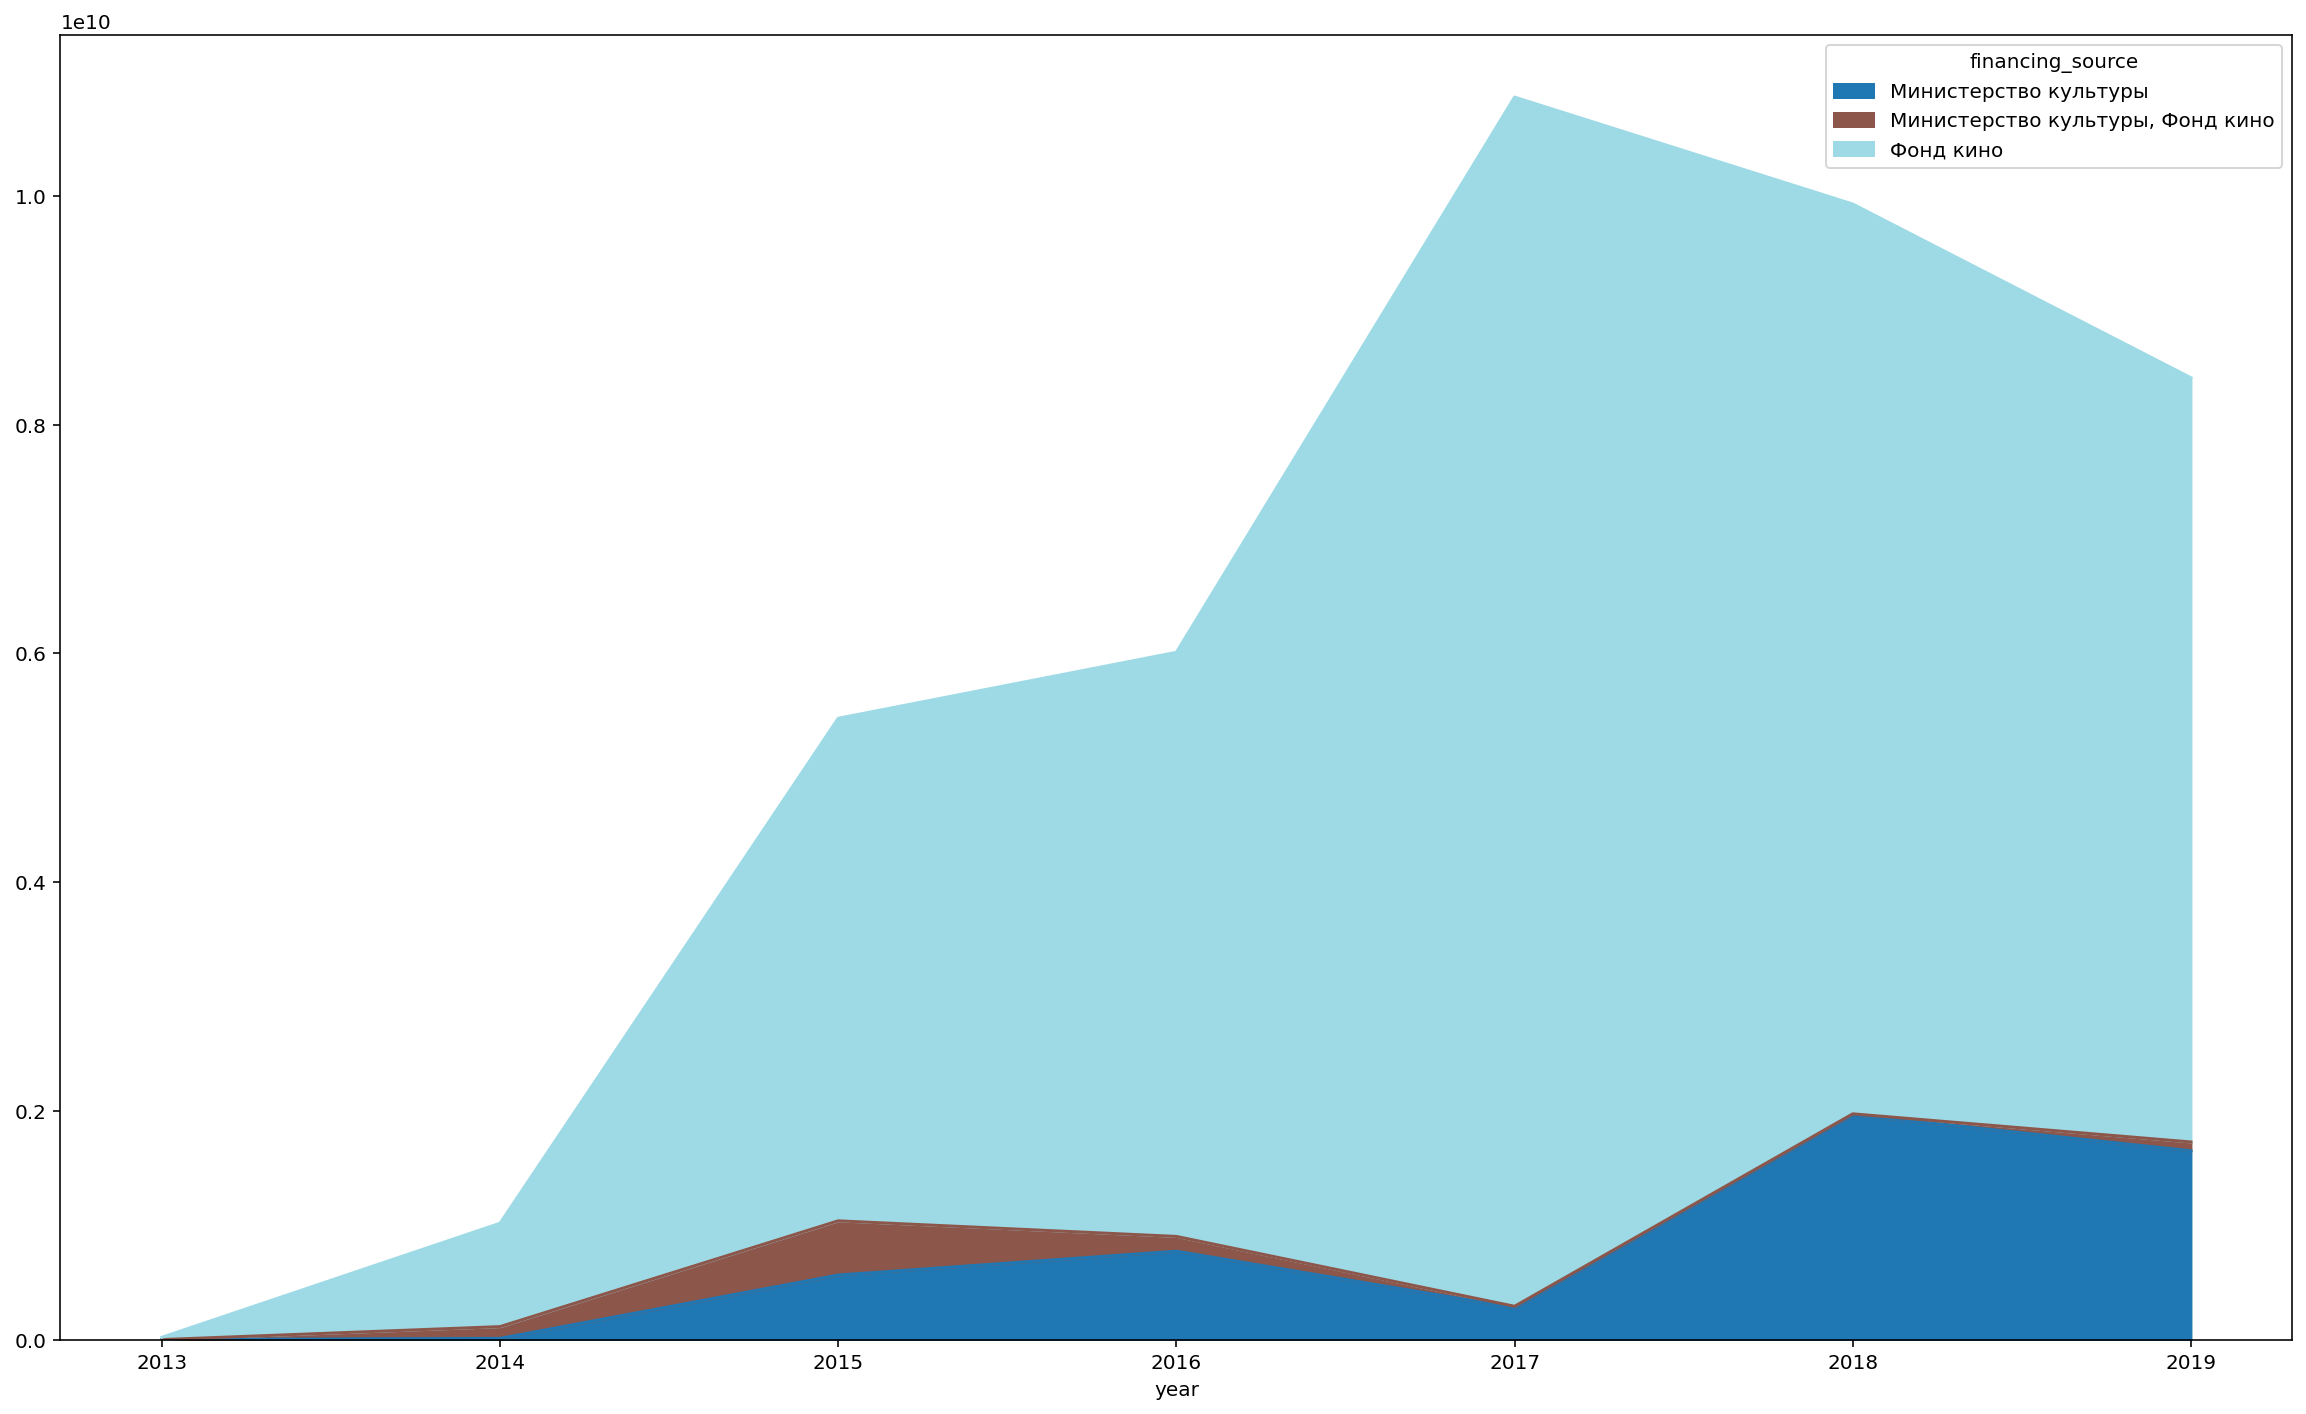

In [78]:
df_fin.pivot_table(index='year',values='box_office',columns='financing_source',aggfunc='sum').plot(kind='area',colormap='tab20',figsize=(20,12))
plt.show()

Тут бесспорный лидер это фонд кино, затем министерство культуры и совместные проекты, посмотрим на режисеров с самой большой кассой.

In [79]:
df_fin.pivot_table(index='main_director',values='box_office',aggfunc='sum').sort_values(by='box_office',ascending=False).head(10)

,box_office
main_director,
К.Шипенко,3.827772e+09
А.Мегердичев,2.779686e+09
Д.Дьяченко,2.404899e+09
А.Сидоров,2.271754e+09
О.Трофим,1.445732e+09
Д.Шмидт,1.412476e+09
Н.Лебедев,1.402255e+09
Д.Киселев,1.399783e+09
Ф.Бондарчук,1.038321e+09


In [80]:
def fraction(row):# Создаем функцию для распределения долей господдержки по группам и сохраним в новый столбец
    if 0 <= row <=0.25:
        return 'До 25% господдержки'
    elif 0.26 <= row <=0.50:
        return "В районе 26-50% процентов"
    elif 0.51 <= row <=0.75:
        return "В районе 50-75% процентов"
    else:
        return "Большая часть госсподдержка"

In [81]:
df_fin['budget_fraction_group'] = df_fin['budget_fraction'].apply(fraction)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [82]:
def rating(row):#Так же создадим функцию для рааспределения бюджета в группы
    if 0 <= row <=5:
        return 'Низкий рейтинг'
    elif 5.1 <= row <=6.5:
        return "Среднячек"
    elif 6.6 <= row <=8.5:
        return "Стоит посмотреть"
    else: 
        
        return "Огонь!"   

In [83]:
df_fin['raitings_group'] = df_fin['ratings'].apply(rating)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [84]:
df_fin.head()#проверим

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,year,main_director,main_genres,budget_fraction,budget_fraction_group,raitings_group
1280,пока еще жива,111005313,2013-10-11 12:00:00+00:00,художественный,"АНО содействия развитию кинематографии ""Ангел-...",россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,8.1,"драма,мелодрама",365353.6,2013,А.Атанесян,драма,0.33,В районе 26-50% процентов,Стоит посмотреть
1446,бесславные придурки,111003314,2014-03-28 12:00:00+00:00,художественный,"ООО ""Компания ""АТК-Студио""",россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,Министерство культуры,NaN,NaN,28140.0,2014,А.Якимчук,None,0.70,В районе 50-75% процентов,Огонь!
1496,невидимки,111004213,2013-09-10 12:00:00+00:00,художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,Фонд кино,5.3,"комедия,фантастика",19957031.5,2013,Р.Давлетьяров,комедия,0.61,В районе 50-75% процентов,Среднячек
1522,берцы,111004314,2014-05-05 12:00:00+00:00,художественный,"ООО ""Студия ""Пассажир""",россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,4.2,драма,55917.5,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69,В районе 50-75% процентов,Низкий рейтинг
1789,братья ч,111004414,2014-04-23 12:00:00+00:00,художественный,"ООО ""Студия ""Пассажир""",россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,6.4,драма,232100.0,2014,М.Угаров,драма,0.62,В районе 50-75% процентов,Среднячек


создадим таблицу по режиссерам, жанрам, долями господдержки и рейтингом и суммируем все по выручке, посмотрим на этот рейтинг

In [85]:
top_20 = df_fin.pivot_table(index=['main_director','main_genres','budget_fraction_group','raitings_group'], \
                            values='box_office',aggfunc='sum').sort_values(by='box_office',ascending=False)[0:20]
top_20

,,,,box_office
main_director,main_genres,budget_fraction_group,raitings_group,
К.Шипенко,комедия,В районе 26-50% процентов,Стоит посмотреть,3.073569e+09
А.Мегердичев,спорт,В районе 50-75% процентов,Стоит посмотреть,2.779686e+09
А.Сидоров,драма,В районе 26-50% процентов,Среднячек,2.271754e+09
Д.Дьяченко,комедия,В районе 26-50% процентов,Стоит посмотреть,1.655038e+09
Н.Лебедев,драма,В районе 50-75% процентов,Стоит посмотреть,1.402255e+09
Ф.Бондарчук,фантастика,Большая часть госсподдержка,Среднячек,1.038321e+09
Д.Шмидт,мультфильм,До 25% господдержки,Среднячек,9.114064e+08
Д.Киселев,комедия,В районе 50-75% процентов,Среднячек,8.554511e+08
Д.Козловский,драма,В районе 50-75% процентов,Стоит посмотреть,8.205280e+08


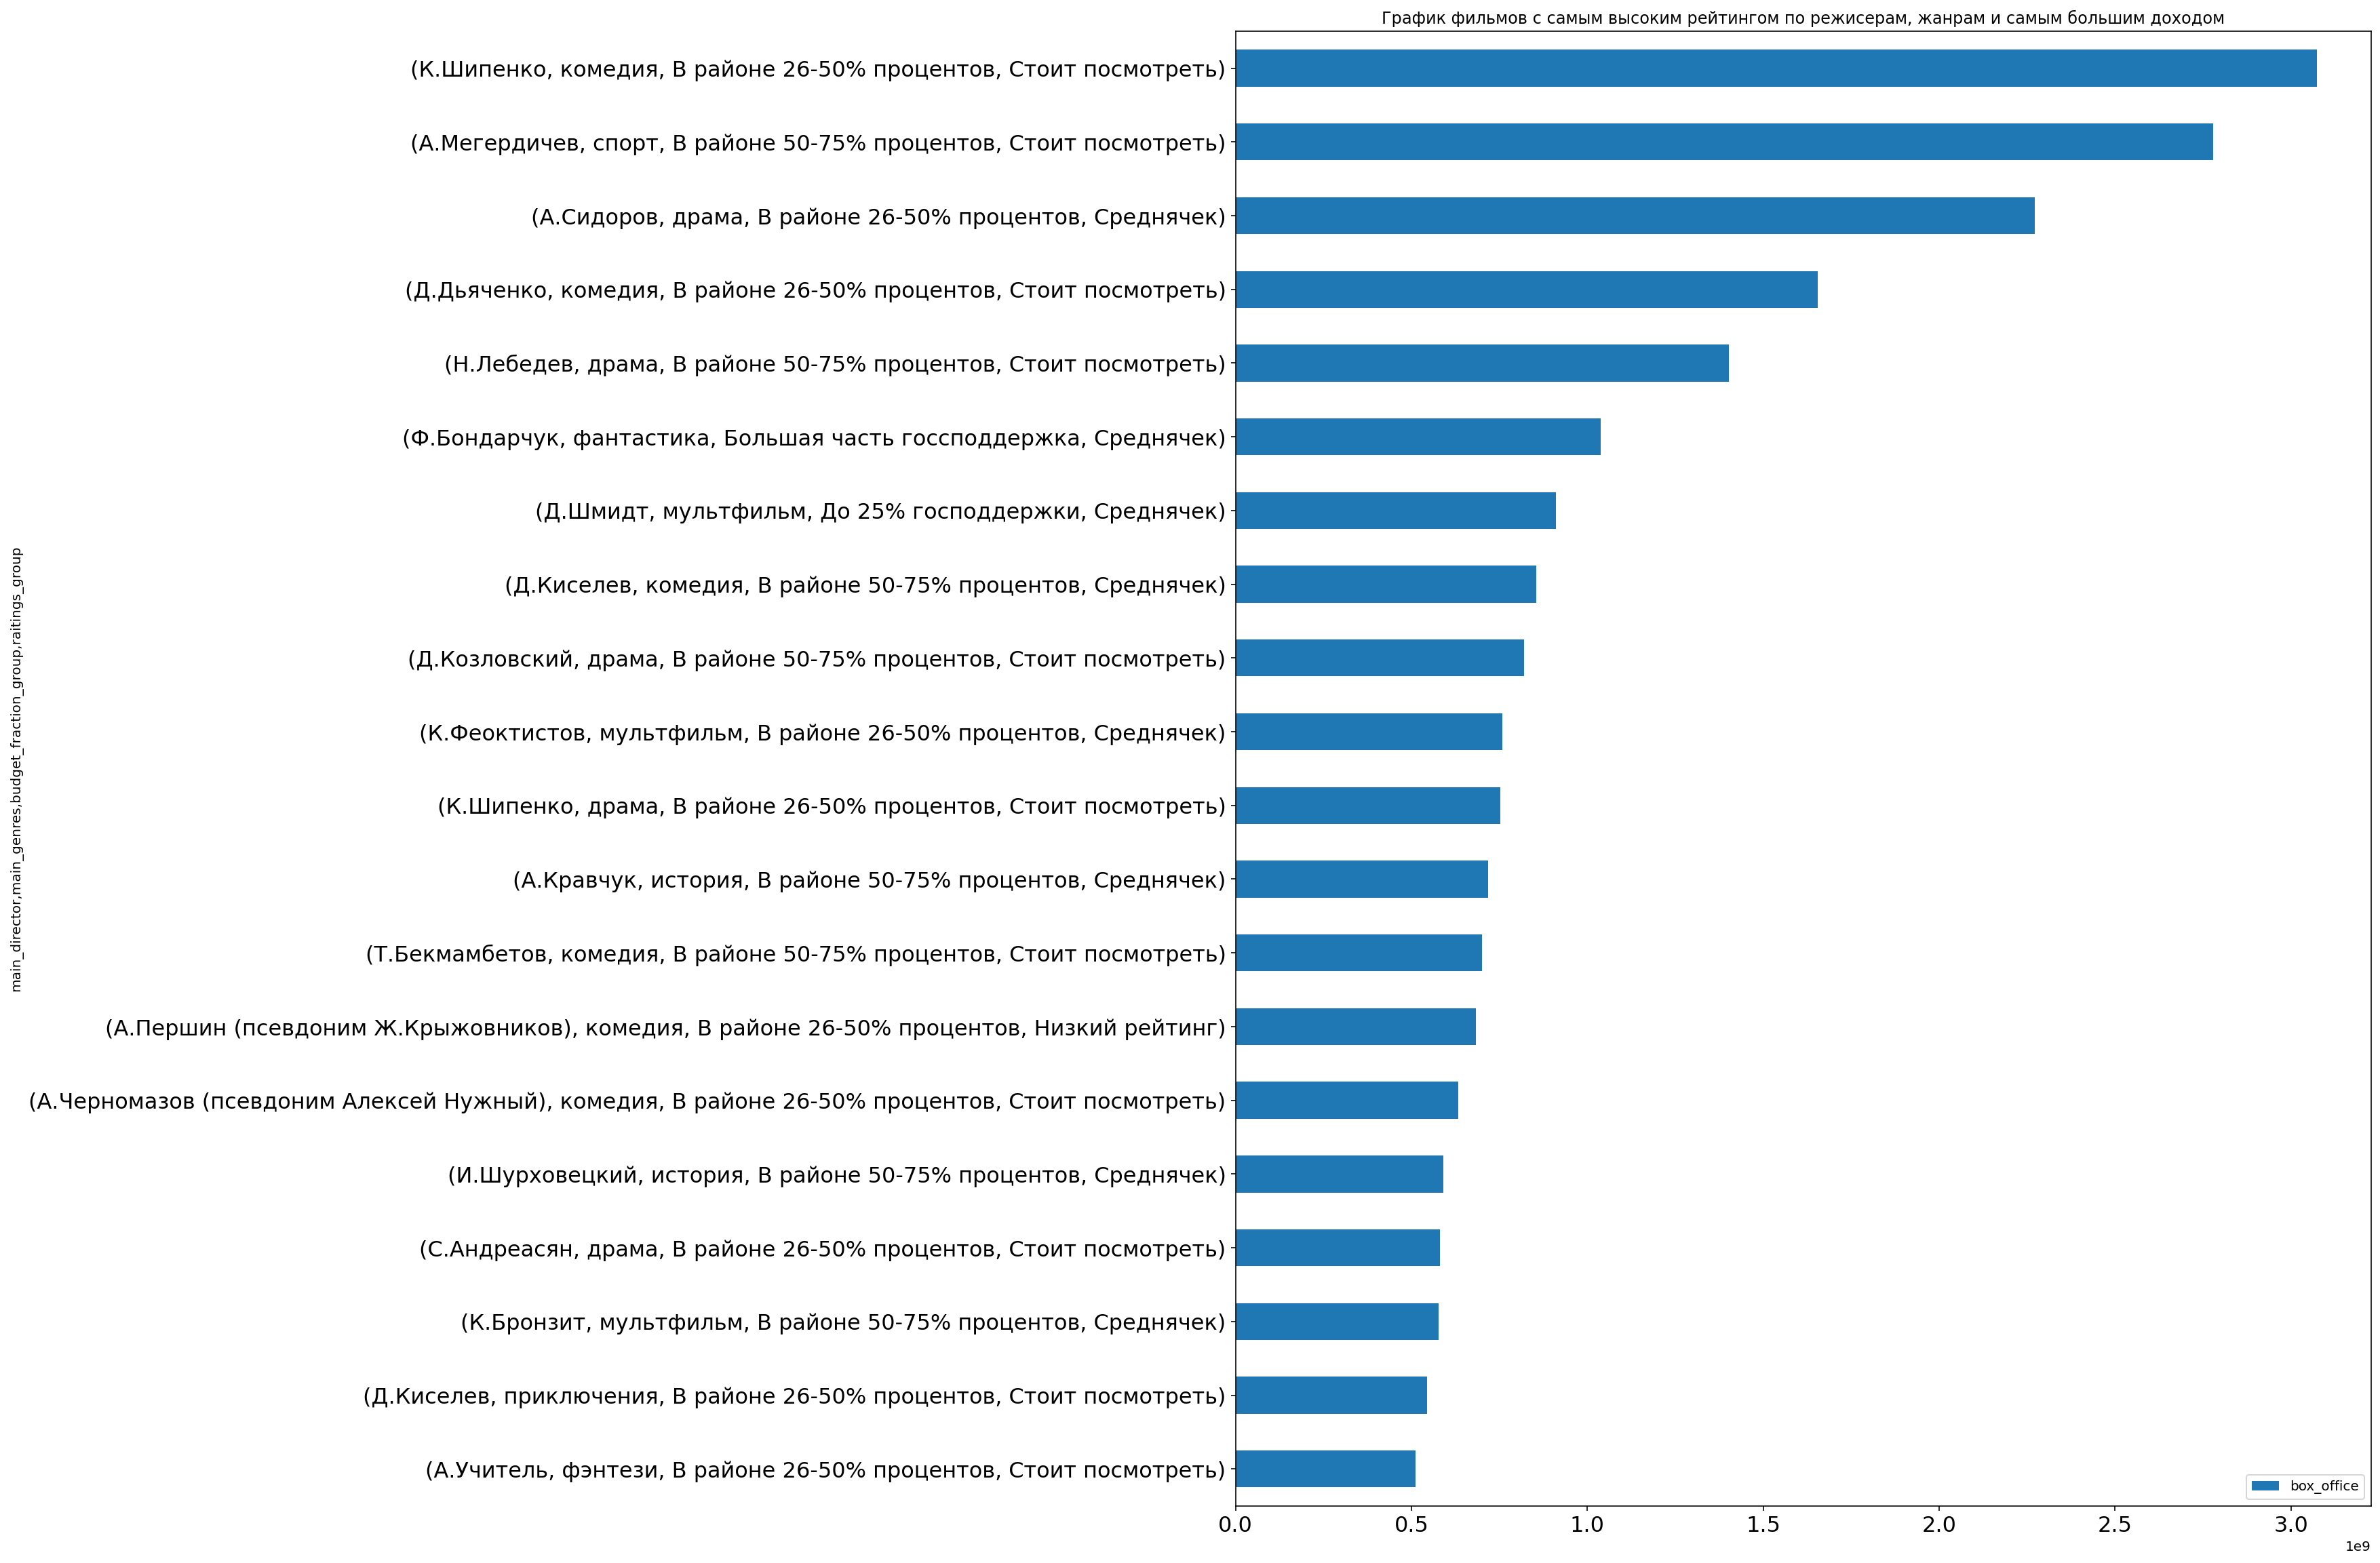

In [86]:
top_20.sort_values(by='box_office').plot(kind='barh',figsize=(15,20),fontsize=16,layout=(),\
            title='График фильмов с самым высоким рейтингом по режисерам, жанрам и самым большим доходом')

plt.show()

Из графика мы видим, что первые места по выручке средств занимают те же жанры что и в графике выше, это комедия, спорт, драма, мультфильмы, причем почти все фильмы с господдержкой от 25% и примерно до 75%, есть и такие у которых доля господдержки составляет больше 75% и в основном это фильмы с хорошим рейтингом.

Посмотрим на зависимость бюджета, рейтинга, выручки и года производства.

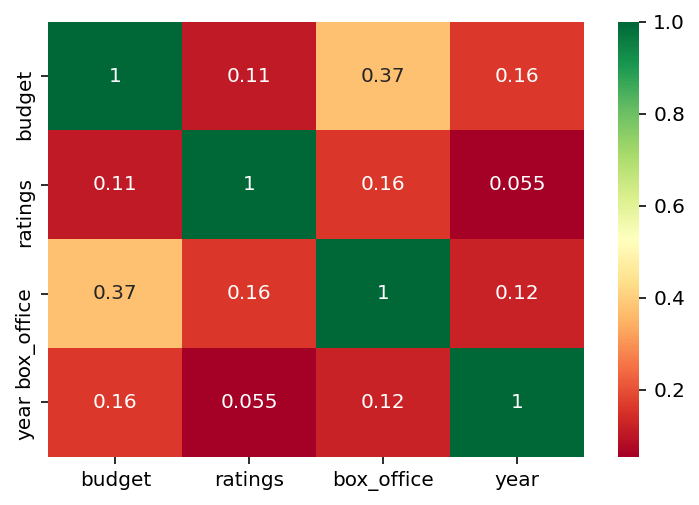

In [87]:
sns.heatmap(df_fin[['budget', 'ratings', 'box_office', 'year']].corr(), annot=True, cmap='RdYlGn')
plt.show()

Из графика видим. что есть небольшая зависимость между бюджетом фильма и его выручкой с его показа, а между всем остальным зависимтостей нет. Найдем процент окупаемости фильмов с господдержкой и добавим его в новый столбец

In [88]:
df_fin['fraction_budg_box'] = (df_fin['budget'] / df_fin['box_office']).round(2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [89]:
top_20_payback = df_fin.pivot_table(index=['main_director','main_genres','budget_fraction_group','raitings_group'],\
                    values='fraction_budg_box',aggfunc='sum').sort_values(by='fraction_budg_box',ascending=False)[0:20]

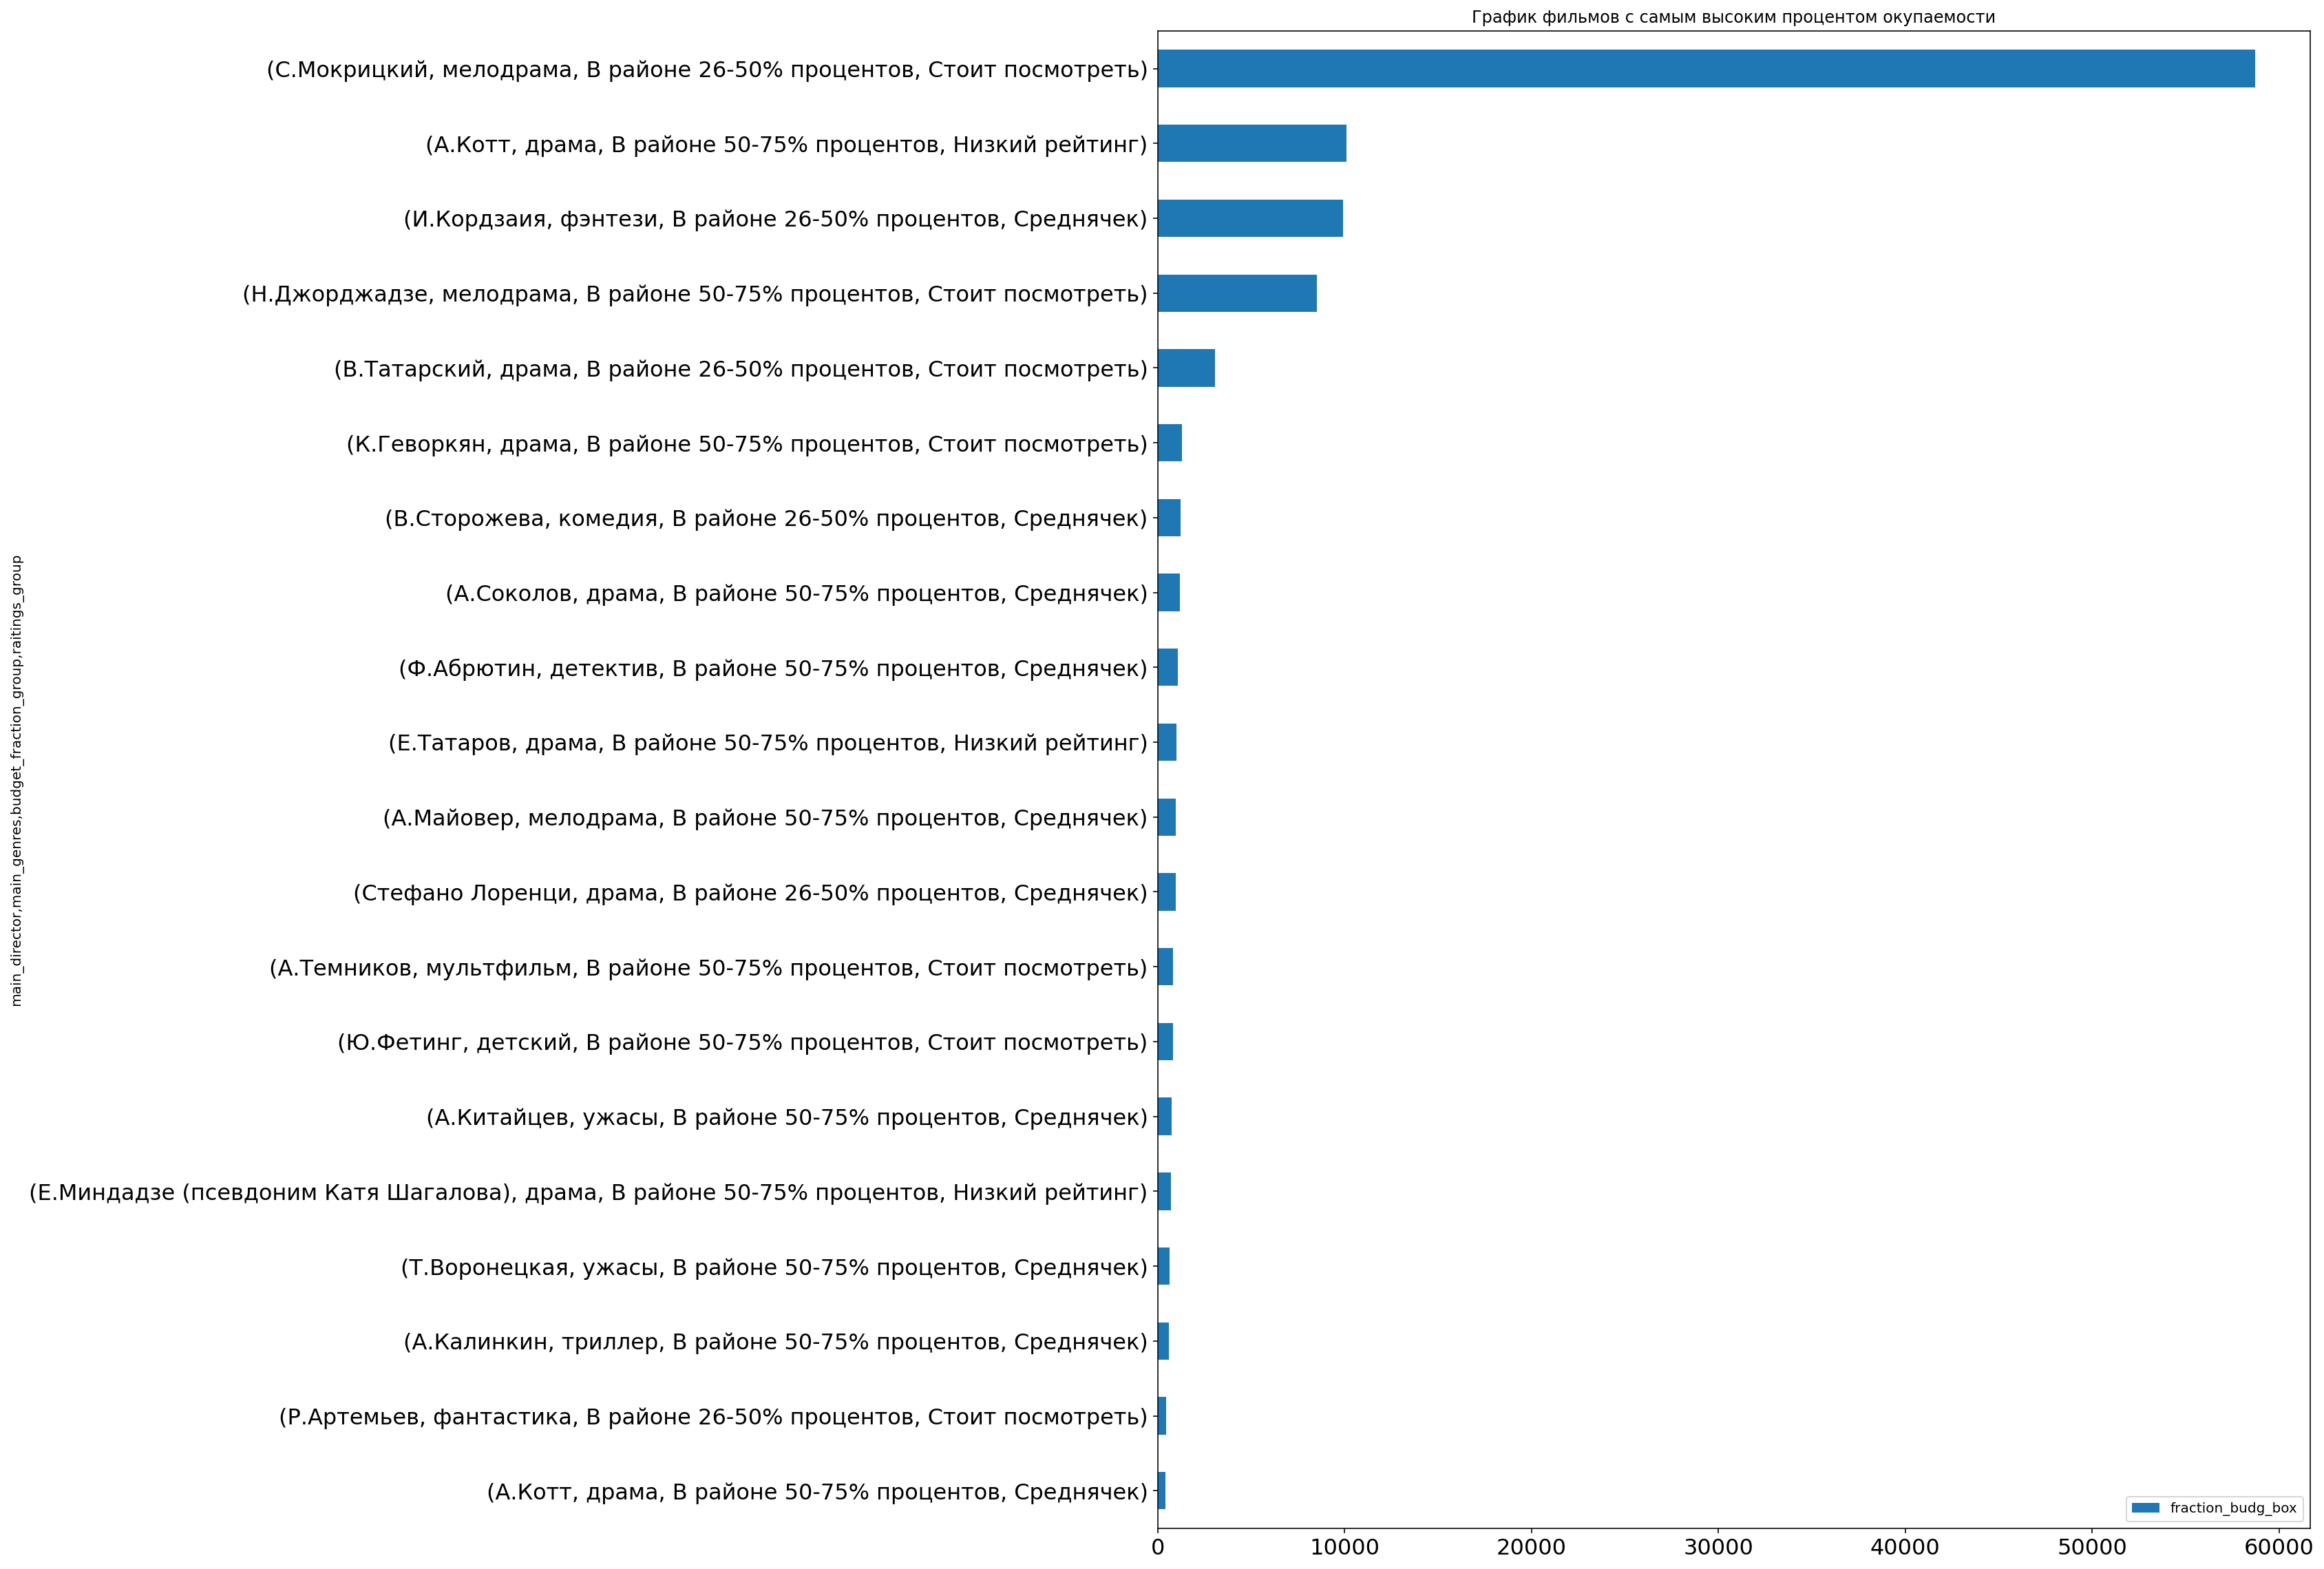

In [90]:
top_20_payback.sort_values(by='fraction_budg_box').plot(kind='barh',figsize=(15,20),fontsize=16,layout=(),\
                    title='График фильмов с самым высоким процентом окупаемости')

plt.show()

Самые окупаемые фиьмы получаются не те, у которых самый высокий доход, а абсолютно другие, ведь два этих графика абсолютно разные, в топе окупаемости даже есть драма с низким рейтингом, а об этом стоит задуматься. Причем уровень господдержки здесь примерно такой же как и на предыдущем графике.

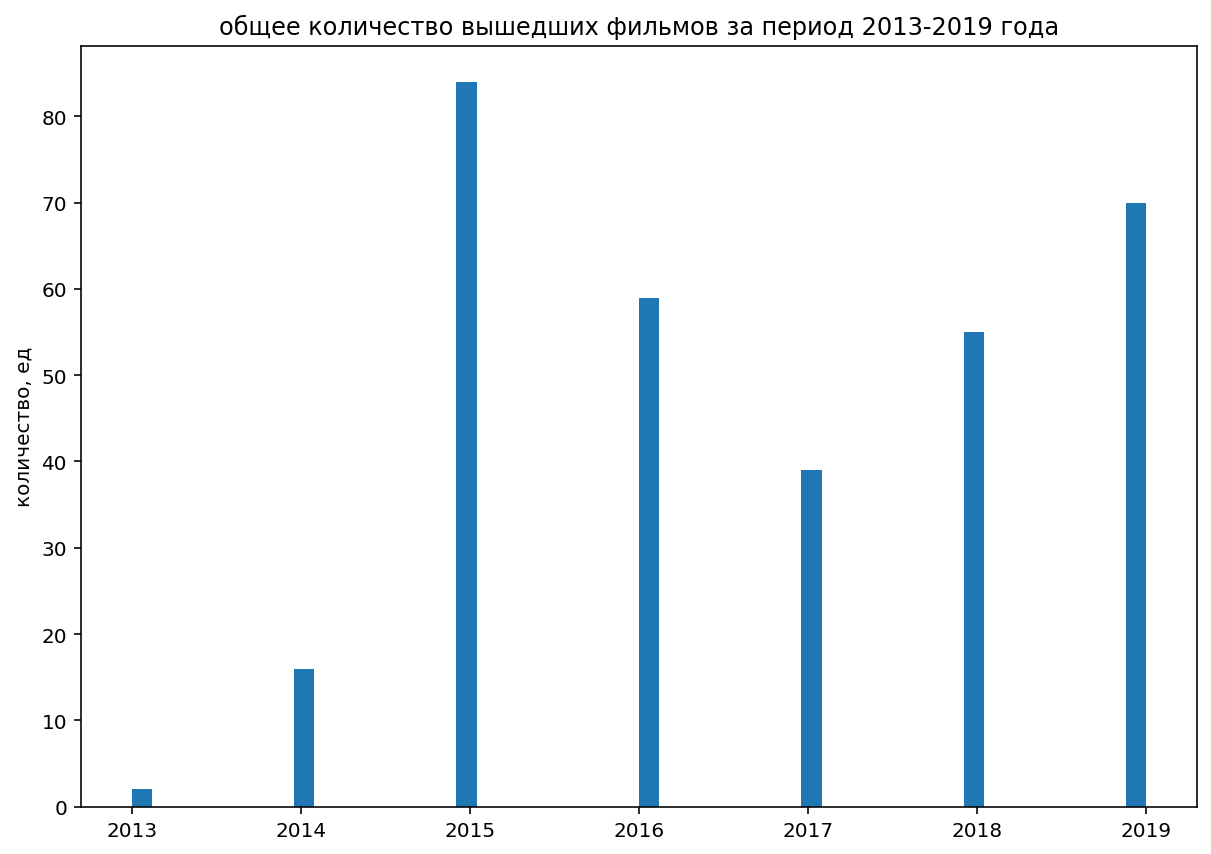

In [91]:
plt.figure(figsize=(10,7))
plt.hist(df_fin['year'],bins=50)#посмотрим на общее количество фильмов вышедших за этот период с господдержкой
plt.title('общее количество вышедших фильмов за период 2013-2019 года')
plt.ylabel('количество, ед')
plt.show()

Мы определили, что основными жанрами приносящими прибыль являются: драма, комедия, мультфильм и отдельно в 2017 году выделялся спорт, лидер в обеспечении господдержки является фонд кино. Так же мы определили, что основной костяк фильмов с господдержкой от 25 и до 75% в основном это фильмы с не плохим рейтингом. И определили, что количество фильмов между годами не так уж и сильно разнится, значит свой постоянный зритель у этих картин есть.

### 5. Общий вывод

1. Мы получили датасет с очень кривыми данными, постоянно что то мешало начать обработку данных и вполной мере погрузится в датафрейм, то лишние знаки препинания, то не корректный регистр написанных слов. Я бы рекомендовал министерству культуры отправить работника который заполня эту таблицу на повышение квалификации. 
2. Мы определили, что рост кассовых сборов начинается в 2014 году и продолжился вплоть до 2017-2018 годов, на них приходится пик значений, уж очень они были богаты на премьеры.
3. Так же заметили, что у фильмов с господдержкой основными жанрами приносящими прибыль являются драма, комедия, мультфильм и отдельно в 2017 году выделялся спорт.
4. Лидер в обеспечении господдержки является фонд кино. 
5. Так же мы определили, что основной костяк фильмов с господдержкой от 25 и до 75% в основном это фильмы с хорошим рейтингом. 
6. И что самое интересное: самые окупаемые фиьмы получаются не те, у которых самый высокий доход, а абсолютно другие, не входящие в топ 20 по доходу. 
7. И определили, что количество фильмов между годами не так уж и сильно разнится, значит свой постоянный зритель у этих картин есть, возможно даже им не стоит особо ничего предпринимать, если фонд кино все устраивает, ведь свою нишу они занимают вполне уверенно.